In [1]:
import pandas as pd
import seaborn as sns;
import datetime
import warnings
import numpy as np
warnings.filterwarnings("ignore")
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

import os
import pandas as pd
import numpy as np
import re
from xlrd import XLRDError


# 내국인 유동인구 전처리

In [2]:
df = pd.read_csv('02-1_내국인유동인구_KOREAN.csv', encoding='cp949')

In [3]:
df.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


In [5]:
df['key']=df['base_date'].astype('str')+df['emd_nm']

In [6]:
maxd = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].max()
maxd.reset_index(inplace=True)

<ipython-input-6-8335dc23ce38>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  maxd = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].max()


In [9]:
mind = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].min()
mind.reset_index(inplace=True)

<ipython-input-9-bb42523a3a16>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mind = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].min()


In [10]:
minmax = pd.merge(maxd, mind[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'key']], on='key', how='left')
minmax.head()

,base_date,emd_nm,key,resd_pop_cnt_x,work_pop_cnt_x,visit_pop_cnt_x,resd_pop_cnt_y,work_pop_cnt_y,visit_pop_cnt_y
0,2018-01-01,건입동,2018-01-01건입동,912.7696,177.5486,875.8981,0.0,0.0,0.0000
1,2018-01-01,구좌읍,2018-01-01구좌읍,1468.7563,122.1988,873.5905,0.0,0.0,4.8805
2,2018-01-01,남원읍,2018-01-01남원읍,1695.6737,170.6877,931.2438,0.0,0.0,2.4388
3,2018-01-01,노형동,2018-01-01노형동,7018.1611,476.5185,1955.4602,0.0,0.0,14.4734
4,2018-01-01,대륜동,2018-01-01대륜동,1455.1544,142.7463,755.4964,0.0,0.0,12.1964


In [11]:
minmax['거주편차'] = abs(minmax['resd_pop_cnt_x']-minmax['resd_pop_cnt_y'])
minmax['일편차'] = abs(minmax['work_pop_cnt_x']-minmax['work_pop_cnt_y'])
minmax['방문편차'] = abs(minmax['visit_pop_cnt_x']-minmax['visit_pop_cnt_y'])
minmax.head()

,base_date,emd_nm,key,resd_pop_cnt_x,work_pop_cnt_x,visit_pop_cnt_x,resd_pop_cnt_y,work_pop_cnt_y,visit_pop_cnt_y,거주편차,일편차,방문편차
0,2018-01-01,건입동,2018-01-01건입동,912.7696,177.5486,875.8981,0.0,0.0,0.0000,912.7696,177.5486,875.8981
1,2018-01-01,구좌읍,2018-01-01구좌읍,1468.7563,122.1988,873.5905,0.0,0.0,4.8805,1468.7563,122.1988,868.7100
2,2018-01-01,남원읍,2018-01-01남원읍,1695.6737,170.6877,931.2438,0.0,0.0,2.4388,1695.6737,170.6877,928.8050
3,2018-01-01,노형동,2018-01-01노형동,7018.1611,476.5185,1955.4602,0.0,0.0,14.4734,7018.1611,476.5185,1940.9868
4,2018-01-01,대륜동,2018-01-01대륜동,1455.1544,142.7463,755.4964,0.0,0.0,12.1964,1455.1544,142.7463,743.3000


In [12]:
minmax.drop(['resd_pop_cnt_x', 'resd_pop_cnt_y', 'work_pop_cnt_x', 'work_pop_cnt_y', 'visit_pop_cnt_x', 'visit_pop_cnt_y'], axis=1, inplace=True)


In [13]:
std = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].std()
std.head()
std.reset_index(inplace=True)

<ipython-input-13-252d9ef7068e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].std()


In [14]:
minmax = pd.merge(minmax, std[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'key']], on='key')
minmax.head()

,base_date,emd_nm,key,거주편차,일편차,방문편차,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,2018-01-01건입동,912.7696,177.5486,875.8981,231.987154,32.519036,159.017791
1,2018-01-01,구좌읍,2018-01-01구좌읍,1468.7563,122.1988,868.7100,375.337030,24.427480,205.615560
2,2018-01-01,남원읍,2018-01-01남원읍,1695.6737,170.6877,928.8050,401.411875,26.636556,164.223005
3,2018-01-01,노형동,2018-01-01노형동,7018.1611,476.5185,1940.9868,1713.902254,101.496860,389.766108
4,2018-01-01,대륜동,2018-01-01대륜동,1455.1544,142.7463,743.3000,374.095876,27.745243,144.482504


In [15]:
cv = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].mean()
cv.head()
cv.reset_index(inplace=True)


<ipython-input-15-cdbdc03a7fa5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cv = df.groupby(['base_date', 'emd_nm','key'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].mean()


In [16]:
minmax = pd.merge(minmax, cv[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'key']], on='key')
minmax['거주변동계수'] = minmax['resd_pop_cnt_x']/minmax['resd_pop_cnt_y']
minmax['일변동계수'] = minmax['work_pop_cnt_x']/minmax['work_pop_cnt_y']
minmax['방문변동계수'] = minmax['visit_pop_cnt_x']/minmax['visit_pop_cnt_y']
minmax.drop([ 'resd_pop_cnt_y','work_pop_cnt_y', 'visit_pop_cnt_y'], axis=1, inplace=True)
minmax.head()

,base_date,emd_nm,key,거주편차,일편차,방문편차,resd_pop_cnt_x,work_pop_cnt_x,visit_pop_cnt_x,거주변동계수,일변동계수,방문변동계수
0,2018-01-01,건입동,2018-01-01건입동,912.7696,177.5486,875.8981,231.987154,32.519036,159.017791,1.162191,1.460199,0.744390
1,2018-01-01,구좌읍,2018-01-01구좌읍,1468.7563,122.1988,868.7100,375.337030,24.427480,205.615560,1.205131,1.254237,0.732758
2,2018-01-01,남원읍,2018-01-01남원읍,1695.6737,170.6877,928.8050,401.411875,26.636556,164.223005,1.219230,1.298574,0.663524
3,2018-01-01,노형동,2018-01-01노형동,7018.1611,476.5185,1940.9868,1713.902254,101.496860,389.766108,1.264033,1.220796,0.793099
4,2018-01-01,대륜동,2018-01-01대륜동,1455.1544,142.7463,743.3000,374.095876,27.745243,144.482504,1.221002,1.200868,0.598085


In [18]:
minmax.columns = ['날짜', '행정동', 'key', '거주편차', '일편차', '방문편차',
       '거주표준편차', '일표준편차', '방문표준편차', '거주변동계수',
       '일변동계수', '방문변동계수']

In [20]:
minmax.to_csv('전처리_내국인유동인구.csv', encoding='utf-8-sig', index=False)

# 장기체류 외국인 유동인구 전처리

In [2]:
df = pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv', encoding='cp949')

In [3]:
df.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


In [3]:
df['base_date'] = pd.to_datetime(df['base_date'])
daylist = ['월', '화', '수', '목', '금', '토', '일']
df['base_day'] = df['base_date'].apply(lambda _: daylist[_.dayofweek])
df.head()

KeyboardInterrupt: 

In [3]:
df['sum'] = df['resd_pop_cnt']+df['work_pop_cnt']+df['visit_pop_cnt']

In [110]:
df['key']=df['base_date']+df['emd_nm']
df['key2']=df['base_date']+df['emd_nm']+df['nationality']

In [95]:
df.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,sum,key
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,10.9183,2018-01-01한림읍
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,447.8142,2018-01-01한림읍
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,59.2156,2018-01-01한림읍
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,8.2099,2018-01-01한림읍
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,18.7942,2018-01-01한림읍


In [111]:
mind = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].min()
mind.reset_index(inplace=True)
mind.head()

<ipython-input-111-2ad00e0c65ea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mind = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].min()


,base_date,emd_nm,key,nationality,key2,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,2018-01-01건입동,CAN,2018-01-01건입동CAN,0.0000,0.0,4.5257
1,2018-01-01,건입동,2018-01-01건입동,CHN,2018-01-01건입동CHN,0.0000,0.0,11.4178
2,2018-01-01,건입동,2018-01-01건입동,ETC,2018-01-01건입동ETC,0.0000,0.0,0.0000
3,2018-01-01,건입동,2018-01-01건입동,IDN,2018-01-01건입동IDN,0.0000,0.0,0.0000
4,2018-01-01,건입동,2018-01-01건입동,JPN,2018-01-01건입동JPN,16.4898,0.0,0.0000


In [112]:
maxd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].max()
maxd.reset_index(inplace=True)

<ipython-input-112-8d10054c0403>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  maxd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].max()


In [113]:
minmax = pd.merge(mind, maxd[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt','key2']], on='key2', how='left')

In [114]:
minmax['장기외국인거주편차'] = abs(minmax['resd_pop_cnt_x']-minmax['resd_pop_cnt_y'])
minmax['장기외국인일편차'] = abs(minmax['work_pop_cnt_x']-minmax['work_pop_cnt_y'])
minmax['장기외국인방문편차'] = abs(minmax['visit_pop_cnt_x']-minmax['visit_pop_cnt_y'])

In [115]:
minmax.head()

,base_date,emd_nm,key,nationality,key2,resd_pop_cnt_x,work_pop_cnt_x,visit_pop_cnt_x,resd_pop_cnt_y,work_pop_cnt_y,visit_pop_cnt_y,장기외국인거주편차,장기외국인일편차,장기외국인방문편차
0,2018-01-01,건입동,2018-01-01건입동,CAN,2018-01-01건입동CAN,0.0000,0.0,4.5257,0.0000,0.0000,4.5714,0.0000,0.0000,0.0457
1,2018-01-01,건입동,2018-01-01건입동,CHN,2018-01-01건입동CHN,0.0000,0.0,11.4178,71.2675,23.7473,91.7041,71.2675,23.7473,80.2863
2,2018-01-01,건입동,2018-01-01건입동,ETC,2018-01-01건입동ETC,0.0000,0.0,0.0000,3.9559,0.0000,5.7578,3.9559,0.0000,5.7578
3,2018-01-01,건입동,2018-01-01건입동,IDN,2018-01-01건입동IDN,0.0000,0.0,0.0000,60.5170,10.9794,16.0848,60.5170,10.9794,16.0848
4,2018-01-01,건입동,2018-01-01건입동,JPN,2018-01-01건입동JPN,16.4898,0.0,0.0000,24.7949,0.0000,5.9963,8.3051,0.0000,5.9963


In [116]:
minmax.drop(['resd_pop_cnt_x', 'resd_pop_cnt_y', 'work_pop_cnt_x', 'work_pop_cnt_y', 'visit_pop_cnt_x', 'visit_pop_cnt_y'], axis=1, inplace=True)

In [117]:
std = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].std()
std.reset_index(inplace=True)

<ipython-input-117-c04ce4a1520d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].std()


In [118]:
add = pd.merge(minmax, std[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt','key2']], on='key2', how='left')

In [119]:
add.head()

,base_date,emd_nm,key,nationality,key2,장기외국인거주편차,장기외국인일편차,장기외국인방문편차,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,2018-01-01건입동,CAN,2018-01-01건입동CAN,0.0000,0.0000,0.0457,0.000000,0.000000,0.019829
1,2018-01-01,건입동,2018-01-01건입동,CHN,2018-01-01건입동CHN,71.2675,23.7473,80.2863,24.387574,7.538843,21.077139
2,2018-01-01,건입동,2018-01-01건입동,ETC,2018-01-01건입동ETC,3.9559,0.0000,5.7578,0.907546,0.000000,1.537527
3,2018-01-01,건입동,2018-01-01건입동,IDN,2018-01-01건입동IDN,60.5170,10.9794,16.0848,25.668617,3.189055,3.596085
4,2018-01-01,건입동,2018-01-01건입동,JPN,2018-01-01건입동JPN,8.3051,0.0000,5.9963,4.030835,0.000000,2.277907


In [121]:
add.columns=['base_date', 'emd_nm', 'key', 'nationality', 'key2', '장기외국인거주편차',
       '장기외국인일편차', '장기외국인방문편차', '장기외국인거주표준편차', '장기외국인일표준편차',
       '장기외국인방문표준편차']

In [160]:
mean = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].mean()
mean.reset_index(inplace=True)
add = pd.merge(add, mean[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt','key2']], on='key2', how='left')

<ipython-input-160-ddacd50f456b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].mean()


In [161]:
add['장기외국인거주변동계수'] = add['장기외국인거주표준편차']/add['resd_pop_cnt']
add['장기외국인일변동계수'] = add['장기외국인일표준편차']/add['work_pop_cnt']
add['장기외국인방문변동계수'] = add['장기외국인방문표준편차']/add['visit_pop_cnt']

In [162]:
add.drop(['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'], axis=1, inplace=True)

In [122]:
sumd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['sum','resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum()
sumd.head()

<ipython-input-122-873f688ec9bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sumd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['sum','resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum()


sum  \
base_date  emd_nm key           nationality key2                          
2018-01-01 건입동    2018-01-01건입동 CAN         2018-01-01건입동CAN    22.6828   
                                CHN         2018-01-01건입동CHN  3966.9873   
                                ETC         2018-01-01건입동ETC    69.9959   
                                IDN         2018-01-01건입동IDN  1712.8062   
                                JPN         2018-01-01건입동JPN   524.2855   

                                                              resd_pop_cnt  \
base_date  emd_nm key           nationality key2                             
2018-01-01 건입동    2018-01-01건입동 CAN         2018-01-01건입동CAN        0.0000   
                                CHN         2018-01-01건입동CHN     1061.2064   
                                ETC         2018-01-01건입동ETC        3.9559   
                                IDN         2018-01-01건입동IDN     1205.5205   
                                JPN         2018-01-01건입동JPN      500.3513   

                                                              work_pop_cnt  \
base_date  emd_nm key           nationality key2                             
2018-01-01 건입동    2018-01-01건입동 CAN         2018-01-01건입동CAN        0.0000   
                                CHN         2018-01-01건입동CHN      505.9029   
                                ETC         2018-01-01건입동ETC        0.0000   
                                IDN         2018-01-01건입동IDN      115.5760   
                                JPN         2018-01-01건입동JPN        0.0000   

                                                              visit_pop_cnt  
base_date  emd_nm key           nationality key2                             
2018-01-01 건입동    2018-01-01건입동 CAN         2018-01-01건입동CAN        22.6828  
                                CHN         2018-01-01건입동CHN      2399.8780  
                                ETC         2018-01-01건입동ETC        66.0400  
                                IDN         2018-01-01건입동IDN       391.7097  
                                JPN         2018-01-01건입동JPN        23.9342

In [123]:
sumofnation = sumd.reset_index().sort_values(by=['base_date', 'emd_nm','sum',], ascending=False)
totalsum = sumofnation.groupby(['base_date', 'emd_nm']).sum()
totalsum.reset_index(inplace=True)

In [124]:
totalsum

,base_date,emd_nm,sum,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,10050.8070,4474.9713,797.8143,4778.0214
1,2018-01-01,구좌읍,11136.9217,7127.8785,714.8696,3294.1736
2,2018-01-01,남원읍,10167.8231,6950.7046,1021.6273,2195.4912
3,2018-01-01,노형동,58525.3567,43922.5457,3131.9551,11470.8559
4,2018-01-01,대륜동,5882.1312,2955.7580,215.7699,2710.6033
...,...,...,...,...,...,...
54906,2021-06-30,표선면,7835.8182,3983.5663,537.6739,3314.5780
54907,2021-06-30,한경면,12517.9684,6672.7130,302.1945,5543.0609
54908,2021-06-30,한림읍,40722.4125,24534.9935,1408.9342,14778.4848
54909,2021-06-30,화북동,9246.9269,6196.7717,822.0786,2228.0766


In [125]:
sumofnation['key'] = sumofnation['base_date']+sumofnation['emd_nm']
totalsum['key'] = totalsum['base_date']+totalsum['emd_nm']

perc = pd.merge(sumofnation, totalsum[['key', 'sum']], on='key', how='left')
perc.head()

,base_date,emd_nm,key,nationality,key2,sum_x,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sum_y
0,2021-06-30,효돈동,2021-06-30효돈동,CHN,2021-06-30효돈동CHN,786.0582,272.5000,73.3656,440.1926,2028.2007
1,2021-06-30,효돈동,2021-06-30효돈동,KHM,2021-06-30효돈동KHM,289.9620,280.1880,0.0000,9.7740,2028.2007
2,2021-06-30,효돈동,2021-06-30효돈동,MMR,2021-06-30효돈동MMR,258.3245,258.3245,0.0000,0.0000,2028.2007
3,2021-06-30,효돈동,2021-06-30효돈동,PHL,2021-06-30효돈동PHL,145.8116,49.7085,0.0000,96.1031,2028.2007
4,2021-06-30,효돈동,2021-06-30효돈동,VNM,2021-06-30효돈동VNM,120.8127,90.6096,0.0000,30.2031,2028.2007


In [126]:
perc['per'] = round(perc['sum_x']/perc['sum_y'], 2)
perc.head()


,base_date,emd_nm,key,nationality,key2,sum_x,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sum_y,per
0,2021-06-30,효돈동,2021-06-30효돈동,CHN,2021-06-30효돈동CHN,786.0582,272.5000,73.3656,440.1926,2028.2007,0.39
1,2021-06-30,효돈동,2021-06-30효돈동,KHM,2021-06-30효돈동KHM,289.9620,280.1880,0.0000,9.7740,2028.2007,0.14
2,2021-06-30,효돈동,2021-06-30효돈동,MMR,2021-06-30효돈동MMR,258.3245,258.3245,0.0000,0.0000,2028.2007,0.13
3,2021-06-30,효돈동,2021-06-30효돈동,PHL,2021-06-30효돈동PHL,145.8116,49.7085,0.0000,96.1031,2028.2007,0.07
4,2021-06-30,효돈동,2021-06-30효돈동,VNM,2021-06-30효돈동VNM,120.8127,90.6096,0.0000,30.2031,2028.2007,0.06


In [127]:
perc.drop(['sum_x', 'sum_y', 'resd_pop_cnt','work_pop_cnt','visit_pop_cnt'], axis=1,inplace=True)
perc.head()

,base_date,emd_nm,key,nationality,key2,per
0,2021-06-30,효돈동,2021-06-30효돈동,CHN,2021-06-30효돈동CHN,0.39
1,2021-06-30,효돈동,2021-06-30효돈동,KHM,2021-06-30효돈동KHM,0.14
2,2021-06-30,효돈동,2021-06-30효돈동,MMR,2021-06-30효돈동MMR,0.13
3,2021-06-30,효돈동,2021-06-30효돈동,PHL,2021-06-30효돈동PHL,0.07
4,2021-06-30,효돈동,2021-06-30효돈동,VNM,2021-06-30효돈동VNM,0.06


In [186]:
total = pd.merge(add, perc[['key2', 'per']], on='key2', how='left')


In [187]:
total.sort_values(by=['base_date', 'emd_nm','per',], ascending=False, inplace=True)


In [188]:
total.reset_index(inplace=True)

In [197]:
rank = []
nat = []
k=1
emd_nm = ''
for i in range(len(total)):
    if(emd_nm != total.loc[i,'emd_nm']):
        emd_nm = total.loc[i,'emd_nm']
        k=1
        rank.append(k)
        nat.append(total.loc[i,'nationality'])
        k+=1
        continue
    if(k<4):
        rank.append(k)
        nat.append(total.loc[i,'nationality'])
        
        k+=1
    else:
        rank.append(k)
        nat.append('ETC')

        



In [198]:
total['rank']=rank
total['nationality2']=nat
total.head(10)

,index,base_date,emd_nm,key,nationality,key2,장기외국인거주편차,장기외국인일편차,장기외국인방문편차,장기외국인거주표준편차,장기외국인일표준편차,장기외국인방문표준편차,장기외국인거주변동계수,장기외국인일변동계수,장기외국인방문변동계수,per,단기외국인방문편차,rank,nationality2
0,1077533,2021-06-30,효돈동,2021-06-30효돈동,CHN,2021-06-30효돈동CHN,15.7211,5.2404,26.2019,6.287833,2.407123,7.129732,1.107582,0.424007,1.255879,0.39,0.0,1,CHN
1,1077537,2021-06-30,효돈동,2021-06-30효돈동,KHM,2021-06-30효돈동KHM,3.2580,0.0000,3.2580,1.640762,0.000000,1.100657,0.140542,0.000000,0.094279,0.14,0.0,2,KHM
2,1077539,2021-06-30,효돈동,2021-06-30효돈동,MMR,2021-06-30효돈동MMR,7.8280,0.0000,0.0000,2.807453,0.000000,0.000000,0.260830,0.000000,0.000000,0.13,0.0,3,MMR
3,1077541,2021-06-30,효돈동,2021-06-30효돈동,PHL,2021-06-30효돈동PHL,3.3139,0.0000,3.3139,1.588998,0.000000,1.588998,1.406519,0.000000,1.406519,0.07,0.0,4,ETC
4,1077546,2021-06-30,효돈동,2021-06-30효돈동,VNM,2021-06-30효돈동VNM,3.7754,0.0000,7.5507,0.755080,0.000000,2.102041,0.208333,0.000000,0.579972,0.06,0.0,4,ETC
5,1077538,2021-06-30,효돈동,2021-06-30효돈동,LKA,2021-06-30효돈동LKA,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.0,4,ETC
6,1077540,2021-06-30,효돈동,2021-06-30효돈동,NPL,2021-06-30효돈동NPL,2.9637,0.0000,8.8912,1.295840,0.000000,2.343042,0.571772,0.000000,1.033835,0.04,0.0,4,ETC
7,1077535,2021-06-30,효돈동,2021-06-30효돈동,ETC,2021-06-30효돈동ETC,0.0000,0.0000,5.7339,0.000000,0.000000,2.225477,0.000000,0.000000,inf,0.03,0.0,4,ETC
8,1077544,2021-06-30,효돈동,2021-06-30효돈동,USA,2021-06-30효돈동USA,0.0000,0.0000,4.4125,0.000000,0.000000,1.602340,0.000000,0.000000,inf,0.03,0.0,4,ETC
9,1077542,2021-06-30,효돈동,2021-06-30효돈동,RUS,2021-06-30효돈동RUS,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,4,ETC


In [199]:
per = total.groupby(['base_date', 'emd_nm','key', 'rank','nationality2']).sum()
per.reset_index(inplace=True)

In [200]:
per.head()

,base_date,emd_nm,key,rank,nationality2,index,장기외국인거주편차,장기외국인일편차,장기외국인방문편차,장기외국인거주표준편차,장기외국인일표준편차,장기외국인방문표준편차,장기외국인거주변동계수,장기외국인일변동계수,장기외국인방문변동계수,per,단기외국인방문편차
0,2018-01-01,건입동,2018-01-01건입동,1,CHN,1,71.2675,23.7473,80.2863,24.387574,7.538843,21.077139,1.103088,0.340993,0.953351,0.39,37.4836
1,2018-01-01,건입동,2018-01-01건입동,2,IDN,3,60.5170,10.9794,16.0848,25.668617,3.189055,3.596085,1.022043,0.126978,0.143185,0.17,34.5000
2,2018-01-01,건입동,2018-01-01건입동,3,VNM,16,37.0441,18.4627,53.7993,12.724020,4.966241,15.629191,1.058469,0.413125,1.300140,0.17,42.3077
3,2018-01-01,건입동,2018-01-01건입동,4,ETC,116,38.6939,0.0000,82.2511,14.815896,0.000000,27.766688,5.463720,0.000000,inf,0.26,79.0938
4,2018-01-01,구좌읍,2018-01-01구좌읍,1,CHN,18,102.9420,15.8133,57.3150,43.321661,3.822396,12.935383,1.025538,0.090486,0.306215,0.27,25.9501


In [203]:
per.columns = ['날짜', '행정동', 'key', '순위', '수정국적', 'index',
       '장기외국인거주편차', '장기외국인일편차', '장기외국인방문편차', '장기외국인거주표준편차', '장기외국인일표준편차',
       '장기외국인방문표준편차', '장기외국인거주변동계수', '장기외국인일변동계수', '장기외국인방문변동계수', '비율']

In [204]:
per.drop(['index'], axis=1, inplace=True)

In [205]:
per.to_csv('외국인_전처리.csv', encoding='utf-8-sig', index=False)

In [90]:
per = pd.read_csv('외국인_전처리.csv')
nat = pd.read_csv('전처리_내국인유동인구.csv')
per.head()

,날짜,행정동,key,순위,수정국적,장기외국인거주편차,장기외국인일편차,장기외국인방문편차,장기외국인거주표준편차,장기외국인일표준편차,장기외국인방문표준편차,장기외국인거주변동계수,장기외국인일변동계수,장기외국인방문변동계수,비율,단기외국인방문편차
0,2018-01-01,건입동,2018-01-01건입동,1,CHN,71.2675,23.7473,80.2863,24.387574,7.538843,21.077139,1.103088,0.340993,0.953351,0.39,37.4836
1,2018-01-01,건입동,2018-01-01건입동,2,IDN,60.5170,10.9794,16.0848,25.668617,3.189055,3.596085,1.022043,0.126978,0.143185,0.17,34.5000
2,2018-01-01,건입동,2018-01-01건입동,3,VNM,37.0441,18.4627,53.7993,12.724020,4.966241,15.629191,1.058469,0.413125,1.300140,0.17,42.3077
3,2018-01-01,건입동,2018-01-01건입동,4,ETC,38.6939,0.0000,82.2511,14.815896,0.000000,27.766688,5.463720,0.000000,inf,0.26,79.0938
4,2018-01-01,구좌읍,2018-01-01구좌읍,1,CHN,102.9420,15.8133,57.3150,43.321661,3.822396,12.935383,1.025538,0.090486,0.306215,0.27,25.9501


In [93]:
행정동 = ["건입동", "구좌읍", "남원읍", "노형동", "대륜동", "대정읍", "대천동", "도두동", "동홍동", 
      "봉개동", "삼도1동", "삼도2동", "삼양동", "서홍동", "성산읍", "송산동", "아라동", "안덕면",
      "애월읍", "연동", "영천동", "예래동", "오라동", "외도동", "용담1동", "용담2동", "우도면", 
      "이도1동", "이도2동", "이호동", "일도1동", "일도2동", "정방동", "조천읍", "중문동", "중앙동", 
      "천지동", "추자면", "표선면", "한경면", "한림읍", "화북동", "효돈동"]

In [94]:
per['날짜'] = pd.to_datetime(per['날짜'])

In [95]:
nat.sort_values(['날짜', '행정동', 'key'], inplace=True)

In [96]:
per.sort_values(['날짜', '행정동', '순위'],inplace=True)

In [97]:
local = pd.DataFrame([], columns=['날짜', '행정동','key'])

In [98]:
날짜 = per['날짜'].unique()
len(날짜)

1277

In [99]:
날짜 = per['날짜'].unique()
date=[]
for i in 날짜:
    for y in range(43):
        date.append(i)
local['날짜']=date


In [100]:
행정동 = per['행정동'].unique()
행정동전체 = []
for y in range(1277):
    for i in 행정동:
        행정동전체.append(i)
local['행정동'] = 행정동전체

len(local)

54911

In [101]:
local.sort_values(['날짜', '행정동'], inplace=True)

In [102]:
local['key'] = local['날짜'].astype('str')+local['행정동']

In [103]:
len(per)//4

54907

In [104]:
장기외국인1거주편차 = []
장기외국인2거주편차 = []
장기외국인3거주편차 = []
장기외국인4거주편차 = []
장기외국인1일편차 = []
장기외국인2일편차 = []
장기외국인3일편차 = []
장기외국인4일편차 = []
장기외국인1방문편차=[]
장기외국인2방문편차=[]
장기외국인3방문편차=[]
장기외국인4방문편차=[]
장기외국인1거주표준편차 = []
장기외국인2거주표준편차 = []
장기외국인3거주표준편차 = []
장기외국인4거주표준편차 = []
장기외국인1일표준편차 = []
장기외국인2일표준편차 = []
장기외국인3일표준편차 = []
장기외국인4일표준편차 = []
장기외국인1방문표준편차=[]
장기외국인2방문표준편차=[]
장기외국인3방문표준편차=[]
장기외국인4방문표준편차=[]
장기외국인1거주변동계수 = []
장기외국인2거주변동계수 = []
장기외국인3거주변동계수 = []
장기외국인4거주변동계수 = []
장기외국인1일변동계수 = []
장기외국인2일변동계수 = []
장기외국인3일변동계수 = []
장기외국인4일변동계수 = []
장기외국인1방문변동계수=[]
장기외국인2방문변동계수=[]
장기외국인3방문변동계수=[]
장기외국인4방문변동계수=[]
장기외국인1비율=[]
장기외국인2비율=[]
장기외국인3비율=[]
장기외국인4비율=[]

now=0;

for i in range(len(per)):
    if per.loc[i,'순위']==1:
        now=1
        장기외국인1거주편차.append(per.loc[i,'장기외국인거주편차'])
        장기외국인1일편차.append(per.loc[i,'장기외국인일편차'])
        장기외국인1방문편차.append(per.loc[i,'장기외국인방문편차'])
        장기외국인1거주표준편차.append(per.loc[i,'장기외국인거주표준편차'])
        장기외국인1일표준편차.append(per.loc[i,'장기외국인일표준편차'])
        장기외국인1방문표준편차.append(per.loc[i,'장기외국인방문표준편차'])
        장기외국인1거주변동계수.append(per.loc[i,'장기외국인거주변동계수'])
        장기외국인1일변동계수.append(per.loc[i,'장기외국인일변동계수'])
        장기외국인1방문변동계수.append(per.loc[i,'장기외국인방문변동계수'])
        장기외국인1비율.append(per.loc[i,'비율'])
        continue
        
    if per.loc[i,'순위']==2:
        now=2
        장기외국인2거주편차.append(per.loc[i,'장기외국인거주편차'])
        장기외국인2일편차.append(per.loc[i,'장기외국인일편차'])
        장기외국인2방문편차.append(per.loc[i,'장기외국인방문편차'])
        장기외국인2거주표준편차.append(per.loc[i,'장기외국인거주표준편차'])
        장기외국인2일표준편차.append(per.loc[i,'장기외국인일표준편차'])
        장기외국인2방문표준편차.append(per.loc[i,'장기외국인방문표준편차'])
        장기외국인2거주변동계수.append(per.loc[i,'장기외국인거주변동계수'])
        장기외국인2일변동계수.append(per.loc[i,'장기외국인일변동계수'])
        장기외국인2방문변동계수.append(per.loc[i,'장기외국인방문변동계수'])
        장기외국인2비율.append(per.loc[i,'비율'])
        
        if (per.loc[i,'행정동']!=per.loc[i+1,'행정동']):
            장기외국인3거주편차.append(0)
            장기외국인3일편차.append(0)
            장기외국인3방문편차.append(0)
            장기외국인3거주표준편차.append(0)
            장기외국인3일표준편차.append(0)
            장기외국인3방문표준편차.append(0)
            장기외국인3거주변동계수.append(0)
            장기외국인3일변동계수.append(0)
            장기외국인3방문변동계수.append(0)
            장기외국인3비율.append(0)
            장기외국인4거주편차.append(0)
            장기외국인4일편차.append(0)
            장기외국인4방문편차.append(0)
            장기외국인4거주표준편차.append(0)
            장기외국인4일표준편차.append(0)
            장기외국인4방문표준편차.append(0)
            장기외국인4거주변동계수.append(0)
            장기외국인4일변동계수.append(0)
            장기외국인4방문변동계수.append(0)
            장기외국인4비율.append(0)

            
        continue
        
    if per.loc[i,'순위']==3:
        now=3
        장기외국인3거주편차.append(per.loc[i,'장기외국인거주편차'])
        장기외국인3일편차.append(per.loc[i,'장기외국인일편차'])
        장기외국인3방문편차.append(per.loc[i,'장기외국인방문편차'])
        장기외국인3거주표준편차.append(per.loc[i,'장기외국인거주표준편차'])
        장기외국인3일표준편차.append(per.loc[i,'장기외국인일표준편차'])
        장기외국인3방문표준편차.append(per.loc[i,'장기외국인방문표준편차'])
        장기외국인3거주변동계수.append(per.loc[i,'장기외국인거주변동계수'])
        장기외국인3일변동계수.append(per.loc[i,'장기외국인일변동계수'])
        장기외국인3방문변동계수.append(per.loc[i,'장기외국인방문변동계수'])
        장기외국인3비율.append(per.loc[i,'비율'])
        
        if (per.loc[i,'행정동']!=per.loc[i+1,'행정동']):
            장기외국인4거주편차.append(0)
            장기외국인4일편차.append(0)
            장기외국인4방문편차.append(0)
            장기외국인4거주표준편차.append(0)
            장기외국인4일표준편차.append(0)
            장기외국인4방문표준편차.append(0)
            장기외국인4거주변동계수.append(0)
            장기외국인4일변동계수.append(0)
            장기외국인4방문변동계수.append(0)
            장기외국인4비율.append(0)
        continue

    if per.loc[i,'순위']==4:
        now=4
        장기외국인4거주편차.append(per.loc[i,'장기외국인거주편차'])
        장기외국인4일편차.append(per.loc[i,'장기외국인일편차'])
        장기외국인4방문편차.append(per.loc[i,'장기외국인방문편차'])
        장기외국인4거주표준편차.append(per.loc[i,'장기외국인거주표준편차'])
        장기외국인4일표준편차.append(per.loc[i,'장기외국인일표준편차'])
        장기외국인4방문표준편차.append(per.loc[i,'장기외국인방문표준편차'])
        장기외국인4거주변동계수.append(per.loc[i,'장기외국인거주변동계수'])
        장기외국인4일변동계수.append(per.loc[i,'장기외국인일변동계수'])
        장기외국인4방문변동계수.append(per.loc[i,'장기외국인방문변동계수'])
        장기외국인4비율.append(per.loc[i,'비율'])
        continue
    
    

len(장기외국인4비율)

54911

In [105]:
local = local.assign(장기1거주편차=장기외국인1거주편차,
                    장기1거주표준편차=장기외국인1거주표준편차,
                    장기1거주변동계수=장기외국인1거주변동계수,
                    장기1일편차=장기외국인1일편차,
                    장기1일표준편차=장기외국인1일표준편차,
                    장기1일변동계수=장기외국인1일변동계수,
                    장기1방문편차=장기외국인1방문편차,
                    장기1방문표준편차=장기외국인1방문표준편차,
                    장기1방문변동계수=장기외국인1방문변동계수,
                    
                    장기2거주편차=장기외국인2거주편차,
                    장기2거주표준편차=장기외국인2거주표준편차,
                    장기2거주변동계수=장기외국인2거주변동계수,
                    장기2일편차=장기외국인2일편차,
                    장기2일표준편차=장기외국인2일표준편차,
                    장기2일변동계수=장기외국인2일변동계수,
                    장기2방문편차=장기외국인2방문편차,
                    장기2방문표준편차=장기외국인2방문표준편차,
                    장기2방문변동계수=장기외국인2방문변동계수,
                    
                    장기3거주편차=장기외국인3거주편차,
                    장기3거주표준편차=장기외국인3거주표준편차,
                    장기3거주변동계수=장기외국인3거주변동계수,
                    장기3일편차=장기외국인3일편차,
                    장기3일표준편차=장기외국인3일표준편차,
                    장기3일변동계수=장기외국인3일변동계수,
                    장기3방문편차=장기외국인3방문편차,
                    장기3방문표준편차=장기외국인3방문표준편차,
                    장기3방문변동계수=장기외국인3방문변동계수,
                    
                    장기4거주편차=장기외국인4거주편차,
                    장기4거주표준편차=장기외국인4거주표준편차,
                    장기4거주변동계수=장기외국인4거주변동계수,
                    장기4일편차=장기외국인4일편차,
                    장기4일표준편차=장기외국인4일표준편차,
                    장기4일변동계수=장기외국인4일변동계수,
                    장기4방문편차=장기외국인4방문편차,
                    장기4방문표준편차=장기외국인4방문표준편차,
                    장기4방문변동계수=장기외국인4방문변동계수)

In [112]:
summ = pd.merge(nat,local.drop(['날짜', '행정동', '단기1방문편차','단기2방문편차','단기3방문편차','단기4방문편차'], axis=1), on='key', how='left')

In [114]:
summ.to_csv('장기외국인전처리_다시.csv', encoding='utf-8-sig', index=False)

# 단기체류 외국인 유동인구 전처리

In [6]:
df = pd.read_csv('02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv', encoding='cp949')

In [3]:
df['base_date'] = pd.to_datetime(df['base_date'])
daylist = ['월', '화', '수', '목', '금', '토', '일']
df['base_day'] = df['base_date'].apply(lambda _: daylist[_.dayofweek])
df.head()

KeyboardInterrupt: 

In [3]:
df['sum'] = df['visit_pop_cnt']

In [4]:
df['key']=df['base_date']+df['emd_nm']
df['key2']=df['base_date']+df['emd_nm']+df['nationality']

In [6]:
mind = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['visit_pop_cnt', 'sum'].min()
mind.reset_index(inplace=True)
mind.head()

<ipython-input-6-d2914714678f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mind = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['visit_pop_cnt', 'sum'].min()


,base_date,emd_nm,key,nationality,key2,visit_pop_cnt,sum
0,2018-01-01,건입동,2018-01-01건입동,CHN,2018-01-01건입동CHN,37.4835,37.4835
1,2018-01-01,건입동,2018-01-01건입동,ETC,2018-01-01건입동ETC,2.6413,2.6413
2,2018-01-01,건입동,2018-01-01건입동,HKG,2018-01-01건입동HKG,3.6771,3.6771
3,2018-01-01,건입동,2018-01-01건입동,IDN,2018-01-01건입동IDN,11.5000,11.5000
4,2018-01-01,건입동,2018-01-01건입동,JPN,2018-01-01건입동JPN,11.1924,11.1924


In [7]:
maxd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['visit_pop_cnt', 'sum'].max()
maxd.reset_index(inplace=True)

<ipython-input-7-2e89efb298c9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  maxd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['visit_pop_cnt', 'sum'].max()


In [8]:
minmax = pd.merge(mind, maxd[['visit_pop_cnt','key2']], on='key2', how='left')

In [9]:
minmax['단기외국인방문편차'] = abs(minmax['visit_pop_cnt_x']-minmax['visit_pop_cnt_y'])

In [10]:
minmax.head()

,base_date,emd_nm,key,nationality,key2,visit_pop_cnt_x,sum,visit_pop_cnt_y,단기외국인방문편차
0,2018-01-01,건입동,2018-01-01건입동,CHN,2018-01-01건입동CHN,37.4835,37.4835,74.9671,37.4836
1,2018-01-01,건입동,2018-01-01건입동,ETC,2018-01-01건입동ETC,2.6413,2.6413,21.1308,18.4895
2,2018-01-01,건입동,2018-01-01건입동,HKG,2018-01-01건입동HKG,3.6771,3.6771,25.7394,22.0623
3,2018-01-01,건입동,2018-01-01건입동,IDN,2018-01-01건입동IDN,11.5000,11.5000,46.0000,34.5000
4,2018-01-01,건입동,2018-01-01건입동,JPN,2018-01-01건입동JPN,11.1924,11.1924,44.7695,33.5771


In [11]:
minmax.drop(['visit_pop_cnt_x', 'visit_pop_cnt_y', 'sum'], axis=1, inplace=True)

In [12]:
std = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'visit_pop_cnt', 'sum'].std()
std.reset_index(inplace=True)

<ipython-input-12-18a0630c3b71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[ 'visit_pop_cnt', 'sum'].std()


In [21]:
std.fillna(0, inplace=True)

In [22]:
add = pd.merge(minmax, std[['visit_pop_cnt','key2']], on='key2', how='left')

In [23]:
add.head()

,base_date,emd_nm,key,nationality,key2,단기외국인방문편차,visit_pop_cnt
0,2018-01-01,건입동,2018-01-01건입동,CHN,2018-01-01건입동CHN,37.4836,12.318906
1,2018-01-01,건입동,2018-01-01건입동,ETC,2018-01-01건입동ETC,18.4895,3.562245
2,2018-01-01,건입동,2018-01-01건입동,HKG,2018-01-01건입동HKG,22.0623,6.919430
3,2018-01-01,건입동,2018-01-01건입동,IDN,2018-01-01건입동IDN,34.5000,8.943001
4,2018-01-01,건입동,2018-01-01건입동,JPN,2018-01-01건입동JPN,33.5771,10.692013


In [24]:
add.columns=['base_date', 'emd_nm', 'key', 'nationality', 'key2','단기외국인방문편차'
      , '단기외국인방문표준편차']

In [25]:
mean = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[  'visit_pop_cnt', 'sum'].mean()
mean.reset_index(inplace=True)
add = pd.merge(add, mean[[ 'visit_pop_cnt','key2']], on='key2', how='left')

<ipython-input-25-6ae5ccc1ccaf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])[  'visit_pop_cnt', 'sum'].mean()


In [26]:

add['단기외국인방문변동계수'] = add['단기외국인방문표준편차']/add['visit_pop_cnt']

In [27]:
add.drop([ 'visit_pop_cnt'], axis=1, inplace=True)

In [28]:
sumd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['sum','visit_pop_cnt'].sum()
sumd.head()

<ipython-input-28-374e21c6bf8e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sumd = df.groupby(['base_date',  'emd_nm','key','nationality','key2'])['sum','visit_pop_cnt'].sum()


sum  \
base_date  emd_nm key           nationality key2                          
2018-01-01 건입동    2018-01-01건입동 CHN         2018-01-01건입동CHN  1424.3743   
                                ETC         2018-01-01건입동ETC   258.8518   
                                HKG         2018-01-01건입동HKG   264.7481   
                                IDN         2018-01-01건입동IDN   483.0000   
                                JPN         2018-01-01건입동JPN   509.2529   

                                                              visit_pop_cnt  
base_date  emd_nm key           nationality key2                             
2018-01-01 건입동    2018-01-01건입동 CHN         2018-01-01건입동CHN      1424.3743  
                                ETC         2018-01-01건입동ETC       258.8518  
                                HKG         2018-01-01건입동HKG       264.7481  
                                IDN         2018-01-01건입동IDN       483.0000  
                                JPN         2018-01-01건입동JPN       509.2529

In [29]:
sumofnation = sumd.reset_index().sort_values(by=['base_date', 'emd_nm','sum',], ascending=False)
totalsum = sumofnation.groupby(['base_date', 'emd_nm']).sum()
totalsum.reset_index(inplace=True)

In [30]:
totalsum

,base_date,emd_nm,sum,visit_pop_cnt
0,2018-01-01,건입동,4777.1626,4777.1626
1,2018-01-01,구좌읍,2367.2567,2367.2567
2,2018-01-01,남원읍,3552.3268,3552.3268
3,2018-01-01,노형동,9654.0358,9654.0358
4,2018-01-01,대륜동,1347.0481,1347.0481
...,...,...,...,...
53711,2021-06-30,표선면,89.8602,89.8602
53712,2021-06-30,한경면,12.4909,12.4909
53713,2021-06-30,한림읍,72.9285,72.9285
53714,2021-06-30,화북동,43.8175,43.8175


In [31]:
sumofnation['key'] = sumofnation['base_date']+sumofnation['emd_nm']
totalsum['key'] = totalsum['base_date']+totalsum['emd_nm']

perc = pd.merge(sumofnation, totalsum[['key', 'sum']], on='key', how='left')
perc.head()

,base_date,emd_nm,key,nationality,key2,sum_x,visit_pop_cnt,sum_y
0,2021-06-30,효돈동,2021-06-30효돈동,USA,2021-06-30효돈동USA,0.9212,0.9212,0.9212
1,2021-06-30,화북동,2021-06-30화북동,USA,2021-06-30화북동USA,42.3752,42.3752,43.8175
2,2021-06-30,화북동,2021-06-30화북동,CHN,2021-06-30화북동CHN,1.4091,1.4091,43.8175
3,2021-06-30,화북동,2021-06-30화북동,HKG,2021-06-30화북동HKG,0.0332,0.0332,43.8175
4,2021-06-30,한림읍,2021-06-30한림읍,ETC,2021-06-30한림읍ETC,27.2521,27.2521,72.9285


In [32]:
perc['per'] = round(perc['sum_x']/perc['sum_y'], 2)
perc.head()


,base_date,emd_nm,key,nationality,key2,sum_x,visit_pop_cnt,sum_y,per
0,2021-06-30,효돈동,2021-06-30효돈동,USA,2021-06-30효돈동USA,0.9212,0.9212,0.9212,1.00
1,2021-06-30,화북동,2021-06-30화북동,USA,2021-06-30화북동USA,42.3752,42.3752,43.8175,0.97
2,2021-06-30,화북동,2021-06-30화북동,CHN,2021-06-30화북동CHN,1.4091,1.4091,43.8175,0.03
3,2021-06-30,화북동,2021-06-30화북동,HKG,2021-06-30화북동HKG,0.0332,0.0332,43.8175,0.00
4,2021-06-30,한림읍,2021-06-30한림읍,ETC,2021-06-30한림읍ETC,27.2521,27.2521,72.9285,0.37


In [33]:
perc.drop(['sum_x', 'sum_y', 'visit_pop_cnt'], axis=1,inplace=True)
perc.head()

,base_date,emd_nm,key,nationality,key2,per
0,2021-06-30,효돈동,2021-06-30효돈동,USA,2021-06-30효돈동USA,1.00
1,2021-06-30,화북동,2021-06-30화북동,USA,2021-06-30화북동USA,0.97
2,2021-06-30,화북동,2021-06-30화북동,CHN,2021-06-30화북동CHN,0.03
3,2021-06-30,화북동,2021-06-30화북동,HKG,2021-06-30화북동HKG,0.00
4,2021-06-30,한림읍,2021-06-30한림읍,ETC,2021-06-30한림읍ETC,0.37


In [34]:
total = pd.merge(add, perc[['key2', 'per']], on='key2', how='left')


In [35]:
total.sort_values(by=['base_date', 'emd_nm','per',], ascending=False, inplace=True)


In [36]:
total.reset_index(inplace=True)

In [37]:
rank = []
nat = []
k=1
emd_nm = ''
for i in range(len(total)):
    if(emd_nm != total.loc[i,'emd_nm']):
        emd_nm = total.loc[i,'emd_nm']
        k=1
        rank.append(k)
        nat.append(total.loc[i,'nationality'])
        k+=1
        continue
    if(k<4):
        rank.append(k)
        nat.append(total.loc[i,'nationality'])
        
        k+=1
    else:
        rank.append(k)
        nat.append('ETC')

        



In [38]:
total['rank']=rank
total['nationality2']=nat
total.head(10)

,index,base_date,emd_nm,key,nationality,key2,단기외국인방문편차,단기외국인방문표준편차,단기외국인방문변동계수,per,rank,nationality2
0,344662,2021-06-30,효돈동,2021-06-30효돈동,USA,2021-06-30효돈동USA,0.0000,0.000000,0.000000,1.00,1,USA
1,344661,2021-06-30,화북동,2021-06-30화북동,USA,2021-06-30화북동USA,0.9212,0.260082,0.147303,0.97,1,USA
2,344659,2021-06-30,화북동,2021-06-30화북동,CHN,2021-06-30화북동CHN,0.0000,0.000000,0.000000,0.03,2,CHN
3,344660,2021-06-30,화북동,2021-06-30화북동,HKG,2021-06-30화북동HKG,0.0000,0.000000,0.000000,0.00,3,HKG
4,344655,2021-06-30,한림읍,2021-06-30한림읍,ETC,2021-06-30한림읍ETC,0.9238,0.333058,0.293313,0.37,1,ETC
5,344658,2021-06-30,한림읍,2021-06-30한림읍,USA,2021-06-30한림읍USA,0.0000,0.000000,0.000000,0.29,2,USA
6,344654,2021-06-30,한림읍,2021-06-30한림읍,CHN,2021-06-30한림읍CHN,0.6038,0.205415,0.242501,0.28,3,CHN
7,344656,2021-06-30,한림읍,2021-06-30한림읍,IDN,2021-06-30한림읍IDN,0.0000,0.000000,0.000000,0.05,4,ETC
8,344657,2021-06-30,한림읍,2021-06-30한림읍,THA,2021-06-30한림읍THA,0.0000,0.000000,0.000000,0.00,4,ETC
9,344651,2021-06-30,한경면,2021-06-30한경면,ETC,2021-06-30한경면ETC,0.4619,0.208902,0.361814,0.55,1,ETC


In [44]:
per = total.groupby(['base_date', 'emd_nm','key', 'rank', 'nationality2']).sum()
per.reset_index(inplace=True)

In [45]:
per.head()

,base_date,emd_nm,key,rank,nationality2,index,단기외국인방문편차,단기외국인방문표준편차,단기외국인방문변동계수,per
0,2018-01-01,건입동,2018-01-01건입동,1,CHN,0,37.4836,12.318906,0.207567,0.30
1,2018-01-01,건입동,2018-01-01건입동,2,VNM,9,42.3077,18.164230,0.374694,0.24
2,2018-01-01,건입동,2018-01-01건입동,3,JPN,4,33.5771,10.692013,0.503892,0.11
3,2018-01-01,건입동,2018-01-01건입동,4,ETC,32,117.9200,33.201802,2.225112,0.35
4,2018-01-01,구좌읍,2018-01-01구좌읍,1,CHN,10,25.9501,9.997260,0.252163,0.40


In [46]:
per['emd_nm'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [49]:
per.sort_values(['base_date', 'emd_nm', 'rank'], inplace=True)

In [54]:
len(per)

193417

In [76]:
local = pd.DataFrame([], columns=['날짜', '행정동','key'])
날짜 = per['base_date'].unique()
date=[]
for i in 날짜:
    for y in range(43):
        date.append(i)
local['날짜']=date
행정동 = per['emd_nm'].unique()
행정동전체 = []
for y in range(1277):
    for i in 행정동:
        행정동전체.append(i)
local['행정동'] = 행정동전체

len(local)
local.sort_values(['날짜', '행정동'], inplace=True)
local['key'] = local['날짜'].astype('str')+local['행정동']

In [80]:
행정동=local['행정동'].unique()
print(행정동)

['건입동' '구좌읍' '남원읍' '노형동' '대륜동' '대정읍' '대천동' '도두동' '동홍동' '봉개동' '삼도1동' '삼도2동'
 '삼양동' '서홍동' '성산읍' '송산동' '아라동' '안덕면' '애월읍' '연동' '영천동' '예래동' '오라동' '외도동'
 '용담1동' '용담2동' '우도면' '이도1동' '이도2동' '이호동' '일도1동' '일도2동' '정방동' '조천읍' '중문동'
 '중앙동' '천지동' '추자면' '표선면' '한경면' '한림읍' '화북동' '효돈동']


In [122]:

장기외국인1방문편차=[]
장기외국인2방문편차=[]
장기외국인3방문편차=[]
장기외국인4방문편차=[]

장기외국인1방문표준편차=[]
장기외국인2방문표준편차=[]
장기외국인3방문표준편차=[]
장기외국인4방문표준편차=[]

장기외국인1방문변동계수=[]
장기외국인2방문변동계수=[]
장기외국인3방문변동계수=[]
장기외국인4방문변동계수=[]

장기외국인1비율=[]
장기외국인2비율=[]
장기외국인3비율=[]
장기외국인4비율=[]

now=0;
행정동=local['행정동'].unique().tolist()

for i in range(len(per)):
    index = 행정동.index(per.loc[i,'emd_nm'])
    if per.loc[i,'rank']==1:
        장기외국인1방문편차.append(per.loc[i,'단기외국인방문편차'])
        장기외국인1방문표준편차.append(per.loc[i,'단기외국인방문표준편차'])
        장기외국인1방문변동계수.append(per.loc[i,'단기외국인방문변동계수'])
        장기외국인1비율.append(per.loc[i,'per'])
        
        if (i==193416):
            장기외국인2방문편차.append(0)
            장기외국인2방문표준편차.append(0)
            장기외국인2방문변동계수.append(0)
            장기외국인2비율.append(0)
            장기외국인3방문편차.append(0)
            장기외국인3방문표준편차.append(0)
            장기외국인3방문변동계수.append(0)
            장기외국인3비율.append(0)
            장기외국인4방문편차.append(0)
            장기외국인4방문표준편차.append(0)
            장기외국인4방문변동계수.append(0)
            장기외국인4비율.append(0)
            for i in range(index+1,len(행정동)):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)
            
            
            
        elif (per.loc[i,'emd_nm']!=per.loc[i+1,'emd_nm']):
            장기외국인2방문편차.append(0)
            장기외국인2방문표준편차.append(0)
            장기외국인2방문변동계수.append(0)
            장기외국인2비율.append(0)
            장기외국인3방문편차.append(0)
            장기외국인3방문표준편차.append(0)
            장기외국인3방문변동계수.append(0)
            장기외국인3비율.append(0)
            장기외국인4방문편차.append(0)
            장기외국인4방문표준편차.append(0)
            장기외국인4방문변동계수.append(0)
            장기외국인4비율.append(0)
            nextindex = 행정동.index(per.loc[i+1,'emd_nm'])

            if ((per.loc[i,'base_date']==per.loc[i+1,'base_date']) and nextindex!=index+1) :    
                for i in range(index+1,nextindex):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)
                        
            elif (per.loc[i,'base_date']!=per.loc[i+1,'base_date']):
                for i in range(index+1,len(행정동)):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)
                
        continue
        
    if per.loc[i,'rank']==2:
        now=2
        장기외국인2방문편차.append(per.loc[i,'단기외국인방문편차'])
        장기외국인2방문표준편차.append(per.loc[i,'단기외국인방문표준편차'])
        장기외국인2방문변동계수.append(per.loc[i,'단기외국인방문변동계수'])
        장기외국인2비율.append(per.loc[i,'per'])
        
        if (per.loc[i,'emd_nm']!=per.loc[i+1,'emd_nm']):
            장기외국인3방문편차.append(0)
            장기외국인3방문표준편차.append(0)
            장기외국인3방문변동계수.append(0)
            장기외국인3비율.append(0)
            장기외국인4방문편차.append(0)
            장기외국인4방문표준편차.append(0)
            장기외국인4방문변동계수.append(0)
            장기외국인4비율.append(0)
            nextindex = 행정동.index(per.loc[i+1,'emd_nm'])

            if ((per.loc[i,'base_date']==per.loc[i+1,'base_date']) and nextindex!=index+1) :    
                for i in range(index+1,nextindex):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)
                        
            elif (per.loc[i,'base_date']!=per.loc[i+1,'base_date']):
                for i in range(index+1,len(행정동)):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)

        continue
        
    if per.loc[i,'rank']==3:
        now=3
        장기외국인3방문편차.append(per.loc[i,'단기외국인방문편차'])
        장기외국인3방문표준편차.append(per.loc[i,'단기외국인방문표준편차'])
        장기외국인3방문변동계수.append(per.loc[i,'단기외국인방문변동계수'])
        장기외국인3비율.append(per.loc[i,'per'])
        
        if (per.loc[i,'emd_nm']!=per.loc[i+1,'emd_nm']):
            장기외국인4방문편차.append(0)
            장기외국인4방문표준편차.append(0)
            장기외국인4방문변동계수.append(0)
            장기외국인4비율.append(0)
            nextindex = 행정동.index(per.loc[i+1,'emd_nm'])

            if ((per.loc[i,'base_date']==per.loc[i+1,'base_date']) and nextindex!=index+1) :    
                for i in range(index+1,nextindex):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)
                        
            elif (per.loc[i,'base_date']!=per.loc[i+1,'base_date']):
                for i in range(index+1,len(행정동)):
                        장기외국인1방문편차.append(0)
                        장기외국인1방문표준편차.append(0)
                        장기외국인1방문변동계수.append(0)
                        장기외국인1비율.append(0)
                        장기외국인2방문편차.append(0)
                        장기외국인2방문표준편차.append(0)
                        장기외국인2방문변동계수.append(0)
                        장기외국인2비율.append(0)
                        장기외국인3방문편차.append(0)
                        장기외국인3방문표준편차.append(0)
                        장기외국인3방문변동계수.append(0)
                        장기외국인3비율.append(0)
                        장기외국인4방문편차.append(0)
                        장기외국인4방문표준편차.append(0)
                        장기외국인4방문변동계수.append(0)
                        장기외국인4비율.append(0)
                
        continue

    if per.loc[i,'rank']==4:
        now=4
        장기외국인4방문편차.append(per.loc[i,'단기외국인방문편차'])
        장기외국인4방문표준편차.append(per.loc[i,'단기외국인방문표준편차'])
        장기외국인4방문변동계수.append(per.loc[i,'단기외국인방문변동계수'])
        장기외국인4비율.append(per.loc[i,'per'])
        nextindex = 행정동.index(per.loc[i+1,'emd_nm'])

        if ((per.loc[i,'base_date']==per.loc[i+1,'base_date']) and nextindex!=index+1) :    
            for i in range(index+1,nextindex):
                    장기외국인1방문편차.append(0)
                    장기외국인1방문표준편차.append(0)
                    장기외국인1방문변동계수.append(0)
                    장기외국인1비율.append(0)
                    장기외국인2방문편차.append(0)
                    장기외국인2방문표준편차.append(0)
                    장기외국인2방문변동계수.append(0)
                    장기외국인2비율.append(0)
                    장기외국인3방문편차.append(0)
                    장기외국인3방문표준편차.append(0)
                    장기외국인3방문변동계수.append(0)
                    장기외국인3비율.append(0)
                    장기외국인4방문편차.append(0)
                    장기외국인4방문표준편차.append(0)
                    장기외국인4방문변동계수.append(0)
                    장기외국인4비율.append(0)

        elif (per.loc[i,'base_date']!=per.loc[i+1,'base_date']):
            for i in range(index+1,len(행정동)):
                    장기외국인1방문편차.append(0)
                    장기외국인1방문표준편차.append(0)
                    장기외국인1방문변동계수.append(0)
                    장기외국인1비율.append(0)
                    장기외국인2방문편차.append(0)
                    장기외국인2방문표준편차.append(0)
                    장기외국인2방문변동계수.append(0)
                    장기외국인2비율.append(0)
                    장기외국인3방문편차.append(0)
                    장기외국인3방문표준편차.append(0)
                    장기외국인3방문변동계수.append(0)
                    장기외국인3비율.append(0)
                    장기외국인4방문편차.append(0)
                    장기외국인4방문표준편차.append(0)
                    장기외국인4방문변동계수.append(0)
                    장기외국인4비율.append(0)
        continue

In [124]:
local = local.assign(
                    단기1방문편차=장기외국인1방문편차,
                    단기1방문표준편차=장기외국인1방문표준편차,
                    단기1방문변동계수=장기외국인1방문변동계수,
                    
                    단기2방문편차=장기외국인2방문편차,
                    단기2방문표준편차=장기외국인2방문표준편차,
                    단기2방문변동계수=장기외국인2방문변동계수,
                    
                    단기3방문편차=장기외국인3방문편차,
                    단기3방문표준편차=장기외국인3방문표준편차,
                    단기3방문변동계수=장기외국인3방문변동계수,
                    
                    단기4방문편차=장기외국인4방문편차,
                    단기4방문표준편차=장기외국인4방문표준편차,
                    단기4방문변동계수=장기외국인4방문변동계수)

In [125]:
fore = pd.read_csv('장기외국인전처리_다시.csv')
fore.columns

Index(['날짜', '행정동', 'key', '거주편차', '일편차', '방문편차', '거주표준편차', '일표준편차', '방문표준편차',
       '거주변동계수', '일변동계수', '방문변동계수', '장기1거주편차', '장기1거주표준편차', '장기1거주변동계수',
       '장기1일편차', '장기1일표준편차', '장기1일변동계수', '장기1방문편차', '장기1방문표준편차', '장기1방문변동계수',
       '장기2거주편차', '장기2거주표준편차', '장기2거주변동계수', '장기2일편차', '장기2일표준편차', '장기2일변동계수',
       '장기2방문편차', '장기2방문표준편차', '장기2방문변동계수', '장기3거주편차', '장기3거주표준편차',
       '장기3거주변동계수', '장기3일편차', '장기3일표준편차', '장기3일변동계수', '장기3방문편차', '장기3방문표준편차',
       '장기3방문변동계수', '장기4거주편차', '장기4거주표준편차', '장기4거주변동계수', '장기4일편차', '장기4일표준편차',
       '장기4일변동계수', '장기4방문편차', '장기4방문표준편차', '장기4방문변동계수'],
      dtype='object')

In [127]:
local.head()

,날짜,행정동,key,단기1방문편차,단기1방문표준편차,단기1방문변동계수,단기2방문편차,단기2방문표준편차,단기2방문변동계수,단기3방문편차,단기3방문표준편차,단기3방문변동계수,단기4방문편차,단기4방문표준편차,단기4방문변동계수
0,2018-01-01,건입동,2018-01-01건입동,37.4836,12.318906,0.207567,42.3077,18.164230,0.374694,33.5771,10.692013,0.503892,117.9200,33.201802,2.225112
1,2018-01-01,구좌읍,2018-01-01구좌읍,25.9501,9.997260,0.252163,93.8263,24.589806,0.472478,27.9809,7.999745,0.730633,22.2478,8.355384,1.588685
2,2018-01-01,남원읍,2018-01-01남원읍,25.9501,6.502031,0.086871,34.3376,9.738096,0.373346,0.0000,0.000000,0.000000,34.9945,11.202995,1.589359
3,2018-01-01,노형동,2018-01-01노형동,181.6510,65.643082,0.241445,31.6962,10.883598,0.323174,67.1542,19.869911,0.613056,70.4259,25.857786,2.240599
4,2018-01-01,대륜동,2018-01-01대륜동,14.4168,4.136351,0.226511,11.1924,3.564903,0.294010,23.1661,4.691507,0.478070,24.7067,11.440933,0.865778


In [129]:
summ = pd.merge(fore,local.drop(['날짜', '행정동', ], axis=1), on='key', how='left')

In [130]:
summ.head()

,날짜,행정동,key,거주편차,일편차,방문편차,거주표준편차,일표준편차,방문표준편차,거주변동계수,...,단기1방문변동계수,단기2방문편차,단기2방문표준편차,단기2방문변동계수,단기3방문편차,단기3방문표준편차,단기3방문변동계수,단기4방문편차,단기4방문표준편차,단기4방문변동계수
0,2018-01-01,건입동,2018-01-01건입동,912.7696,177.5486,875.8981,231.987154,32.519036,159.017791,1.162191,...,0.207567,42.3077,18.164230,0.374694,33.5771,10.692013,0.503892,117.9200,33.201802,2.225112
1,2018-01-01,구좌읍,2018-01-01구좌읍,1468.7563,122.1988,868.7100,375.337030,24.427480,205.615560,1.205131,...,0.252163,93.8263,24.589806,0.472478,27.9809,7.999745,0.730633,22.2478,8.355384,1.588685
2,2018-01-01,남원읍,2018-01-01남원읍,1695.6737,170.6877,928.8050,401.411875,26.636556,164.223005,1.219230,...,0.086871,34.3376,9.738096,0.373346,0.0000,0.000000,0.000000,34.9945,11.202995,1.589359
3,2018-01-01,노형동,2018-01-01노형동,7018.1611,476.5185,1940.9868,1713.902254,101.496860,389.766108,1.264033,...,0.241445,31.6962,10.883598,0.323174,67.1542,19.869911,0.613056,70.4259,25.857786,2.240599
4,2018-01-01,대륜동,2018-01-01대륜동,1455.1544,142.7463,743.3000,374.095876,27.745243,144.482504,1.221002,...,0.226511,11.1924,3.564903,0.294010,23.1661,4.691507,0.478070,24.7067,11.440933,0.865778


In [132]:
summ.to_csv('유동인구_다시.csv', encoding='utf-8-sig', index=False)

# 지방세,재산세,지방소득세

In [2]:
path = './Tax_local/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if (file.endswith('.xlsx')|file.endswith('.xls')) ] ## 파일명 끝이 .csv인 경우
file_list_py

['2018년 10월 지방세 징수월보(누리집).xlsx',
 '2018년 11월 지방세 징수월보(누리집).xlsx',
 '2018년 12월 지방세 징수월보(누리집).xlsx',
 '2018년 1월 지방세 징수액.xlsx',
 '2018년 2월 지방세 징수액.xlsx',
 '2018년 3월 지방세 징수액.xlsx',
 '2018년 4월 징수액.xlsx',
 '2018년 5월 지방세 징수액 현황.xlsx',
 '2018년 6월 지방세 징수액(누리집).xlsx',
 '2018년 7월 지방세 징수액(누리집).xlsx',
 '2018년 8월 지방세 징수월보(누리집).xlsx',
 '2018년 9월 지방세 징수월보(누리집).xlsx',
 '2019년 10월 지방세 징수월보(누리집).xlsx',
 '2019년 11월 지방세 징수월보(누리집).xlsx',
 '2019년 12월 지방세 징수월보(누리집).xlsx',
 '2019년 1월 지방세 징수월보(누리집).xlsx',
 '2019년 2월 지방세 징수월보(누리집).xlsx',
 '2019년 3월 지방세 징수월보(누리집).xlsx',
 '2019년 4월 지방세 징수월보(누리집).xlsx',
 '2019년 5월 지방세 징수월보(누리집).xlsx',
 '2019년 6월 지방세 징수월보(누리집).xlsx',
 '2019년 7월 지방세 징수월보(누리집).xlsx',
 '2019년 8월 지방세 징수월보(누리집).xlsx',
 '2019년 9월 지방세 징수월보(누리집).xlsx',
 '2020년 10월 지방세 징수월보(누리집).xlsx',
 '2020년 11월 지방세 징수월보(누리집).xlsx',
 '2020년 12월분 지방세 징수월보(누리집).xls',
 '2020년 1월 지방세 징수월보(누리집).xlsx',
 '2020년 2월 지방세 징수월보(누리집).xlsx',
 '2020년 3월 지방세 징수월보(누리집).xlsx',
 '2020년 4월 지방세 징수월보(누리집).xlsx',
 '2020년 5월 지방세 징수월보(누리집).xlsx',


In [60]:
df = pd.DataFrame([], columns=['기준년', '기준월', '지방세', '취득세', '등록면허세', '레저세', '담배소비세', '지방소비세', '주민세', '지방소득세', '재산세', '자동차세', '지역자원시설세', '지방교육세'])
df

,기준년,기준월,지방세,취득세,등록면허세,레저세,담배소비세,지방소비세,주민세,지방소득세,재산세,자동차세,지역자원시설세,지방교육세


In [61]:
for i in file_list_py:
    try:
        data = pd.read_excel(path + i)

        name = i.split()
        year = name[0]
        month=name[1]
        mon = re.search('\d+', month).group()

        monthlyData = [int(year[:-1]), int(mon)]



        total = data.index[data.iloc[:,2]=='계'].tolist()[0]
        get = data.index[data.iloc[:,2]=='취득세'].tolist()[0]
        idcard = data.index[data.iloc[:,2]=='등록면허세'].tolist()[0]
        lesure = data.index[data.iloc[:,2]=='레저세'].tolist()[0]
        cigar = data.index[data.iloc[:,2]=='담배소비세'].tolist()[0]
        consume = data.index[data.iloc[:,2]=='지방소비세'].tolist()[0]
        inhabit = data.index[data.iloc[:,2]=='주민세'].tolist()[0]
        earn = data.index[data.iloc[:,2]=='지방소득세'].tolist()[0]
        prop = data.index[data.iloc[:,2]=='재산세'].tolist()[0]
        car = data.index[data.iloc[:,2]=='자동차세'].tolist()[0]
        facil = data.index[data.iloc[:,2]=='지역자원시설세'].tolist()[0]
        edu = data.index[data.iloc[:,2]=='지방교육세'].tolist()[0]
        indexs= [total, get, idcard, lesure, cigar, consume, inhabit, earn, prop, car, facil, edu]

        for y in indexs:
            monthlyData.append(data.iloc[y,-2])
        df.loc[len(df)] = monthlyData
        
    except XLRDError:
        print(i)

    except FileNotFoundError:
        print(i)

2021년 1월분 지방세 징수월보(누리집).xlsx


In [63]:
df.loc[len(df)] = [2021,1, 1,1,1,1,1,1,1,1,1,1,1,1]
df.loc[len(df)] = [2021,8, 1,1,1,1,1,1,1,1,1,1,1,1]

In [64]:
df.sort_values(['기준년', '기준월'], inplace=True)

In [65]:
df.reset_index(inplace=True)
df.to_csv('Tax.csv', encoding='utf-8-sig', index=False)
DF = pd.read_csv('Tax.csv')

In [66]:
DF=df
df.columns

Index(['index', '기준년', '기준월', '지방세', '취득세', '등록면허세', '레저세', '담배소비세', '지방소비세',
       '주민세', '지방소득세', '재산세', '자동차세', '지역자원시설세', '지방교육세'],
      dtype='object')

In [67]:
df.drop(['취득세', '등록면허세', '레저세', '담배소비세', '지방소비세', '주민세',
        '자동차세', '지역자원시설세', '지방교육세'], axis=1, inplace=True)


In [68]:
sumup=df

In [70]:

sumup['재산세비율']=sumup['재산세']/sumup['지방세']
sumup['소득세비율']=sumup['지방소득세']/sumup['지방세']

change = ((sumup.loc[12, '지방세']/sumup.loc[11,'지방세'])+(sumup.loc[24, '지방세']/sumup.loc[23,'지방세']))/2

sumup.loc[36,'지방세']=change*sumup.loc[35,'지방세']

sumup.loc[36,'재산세비율'] = ((sumup.loc[12, '재산세비율'])+(sumup.loc[24, '재산세비율'])+(sumup.loc[0,'재산세비율']))/3


sumup.loc[36,'재산세']=sumup.loc[36,'재산세비율']*sumup.loc[36,'지방세']

sumup.loc[36,'소득세비율'] = ((sumup.loc[12, '소득세비율'])+(sumup.loc[24, '소득세비율'])+(sumup.loc[0,'소득세비율']))/3


sumup.loc[36,'지방소득세']=sumup.loc[36,'소득세비율']*sumup.loc[36,'지방세']

In [71]:
sumup

,index,기준년,기준월,지방세,지방소득세,재산세,재산세비율,소득세비율
0,3,2018,1,118889432010,8918270440,5033250,4.23356e-05,0.0750131
1,4,2018,2,108565673870,7643068390,1709880,1.57497e-05,0.0704004
2,5,2018,3,69640319400,6004303150,795110,1.14174e-05,0.0862188
3,6,2018,4,153567053510,75885058650,168200,1.09529e-06,0.494149
4,7,2018,5,126661817230,20437879870,51845570,0.000409323,0.161358
5,8,2018,6,83888755780,12313642880,12696980,0.000151355,0.146785
6,9,2018,7,183836097590,17199413920,40833428910,0.222119,0.0935584
7,10,2018,8,122190286180,8826736230,2403737800,0.0196721,0.0722376
8,11,2018,9,134937061430,6594791390,57500297730,0.426127,0.0488731
9,0,2018,10,128205511620,8418359450,38743412860,0.302198,0.065663


In [72]:
change = ((sumup.loc[7, '지방세']/sumup.loc[6,'지방세'])+(sumup.loc[19, '지방세']/sumup.loc[18,'지방세'])+(sumup.loc[31, '지방세']/sumup.loc[30,'지방세']))/3

sumup.loc[43,'지방세']=change*sumup.loc[42,'지방세']

sumup.loc[43,'재산세비율'] = ((sumup.loc[7, '재산세비율'])+(sumup.loc[19, '재산세비율'])+(sumup.loc[31,'재산세비율']))/3
sumup.loc[43,'재산세']=sumup.loc[43,'재산세비율']*sumup.loc[43,'지방세']

sumup.loc[43,'소득세비율'] = ((sumup.loc[7, '소득세비율'])+(sumup.loc[19, '소득세비율'])+(sumup.loc[31,'소득세비율']))/3
sumup.loc[43,'지방소득세']=sumup.loc[43,'소득세비율']*sumup.loc[43,'지방세']

sumup

,index,기준년,기준월,지방세,지방소득세,재산세,재산세비율,소득세비율
0,3,2018,1,118889432010,8918270440,5033250,4.23356e-05,0.0750131
1,4,2018,2,108565673870,7643068390,1709880,1.57497e-05,0.0704004
2,5,2018,3,69640319400,6004303150,795110,1.14174e-05,0.0862188
3,6,2018,4,153567053510,75885058650,168200,1.09529e-06,0.494149
4,7,2018,5,126661817230,20437879870,51845570,0.000409323,0.161358
5,8,2018,6,83888755780,12313642880,12696980,0.000151355,0.146785
6,9,2018,7,183836097590,17199413920,40833428910,0.222119,0.0935584
7,10,2018,8,122190286180,8826736230,2403737800,0.0196721,0.0722376
8,11,2018,9,134937061430,6594791390,57500297730,0.426127,0.0488731
9,0,2018,10,128205511620,8418359450,38743412860,0.302198,0.065663


In [74]:
sumup.drop(['index', '재산세비율', '소득세비율'], axis=1, inplace=True)
sumup.to_csv('지방세정보_8월까지.csv', encoding='utf-8-sig', index=False)

# 경제지표 전처리

In [29]:
df = pd.read_csv('송재현_전처리2.csv', encoding='cp949')
df2 = pd.read_csv('./Tax_local/지방세정보_8월까지.csv')

df.head()

,key,CPI,고용률,실업률
0,20181,104.55,68.8,2.0
1,20182,105.41,67.3,3.4
2,20183,104.54,68.6,1.5
3,20184,104.72,68.5,1.4
4,20185,105.12,68.6,1.4


In [30]:
df2['key'] = df2['기준년'].astype('str')+df2['기준월'].astype('str')

In [31]:
df['key'] = df['key'].astype('str')

In [32]:
sumup = pd.merge(df2,df, on='key', how='left')


In [33]:
sumup.columns

Index(['기준년', '기준월', '지방세', '지방소득세', '재산세', 'key', 'CPI', '고용률', '실업률'], dtype='object')

In [20]:
sumup.reset_index()

,일자,기준년,기준월,지방세,지방소득세,재산세,CPI,고용률,실업률
0,2018-01-01,2018,1,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,2.0
1,2018-02-01,2018,2,1.085657e+11,7.643068e+09,1.709880e+06,105.41,67.3,3.4
2,2018-03-01,2018,3,6.964032e+10,6.004303e+09,7.951100e+05,104.54,68.6,1.5
3,2018-04-01,2018,4,1.535671e+11,7.588506e+10,1.682000e+05,104.72,68.5,1.4
4,2018-05-01,2018,5,1.266618e+11,2.043788e+10,5.184557e+07,105.12,68.6,1.4
5,2018-06-01,2018,6,8.388876e+10,1.231364e+10,1.269698e+07,104.93,68.4,1.4
6,2018-07-01,2018,7,1.838361e+11,1.719941e+10,4.083343e+10,105.09,68.2,1.9
7,2018-08-01,2018,8,1.221903e+11,8.826736e+09,2.403738e+09,105.24,68.1,1.7
8,2018-09-01,2018,9,1.349371e+11,6.594791e+09,5.750030e+10,106.04,68.2,1.2
9,2018-10-01,2018,10,1.282055e+11,8.418359e+09,3.874341e+10,105.97,68.3,2.7


In [37]:
sumup.drop(['key'], axis=1, inplace=True)

In [38]:
sumup.to_csv('경제지표_8월까지.csv', encoding='utf-8-sig', index=False)

# Auto_ARIMA 

In [2]:
df = pd.read_csv("최종 전처리완료.csv")

In [46]:
df_pred = pd.read_csv('7.8월시계열.csv')
df_pred['일자'] = pd.to_datetime(df_pred['일자'])
df_pred.set_index('일자', inplace=True)
df_pred

""
일자
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
...
2021-08-27
2021-08-28
2021-08-29


In [7]:
data = df[['일자','행정동명','거주편차', '일편차', '방문편차', '거주표준편차', '일표준편차', '방문표준편차', '장기1거주편차',
       '장기1거주표준편차', '장기1일편차', '장기1일표준편차', '장기1방문편차', '장기1방문표준편차', '장기2거주편차',
       '장기2거주표준편차', '장기2일편차', '장기2일표준편차', '장기2방문편차', '장기2방문표준편차', '장기3거주편차',
       '장기3거주표준편차', '장기3일편차', '장기3일표준편차', '장기3방문편차', '장기3방문표준편차', '장기4거주편차',
       '장기4거주표준편차', '장기4일편차', '장기4일표준편차', '장기4방문편차', '장기4방문표준편차', '단기1방문편차',
       '단기1방문표준편차', '단기2방문편차', '단기2방문표준편차', '단기3방문편차', '단기3방문표준편차', '단기4방문편차',
       '단기4방문표준편차','연_월간식결제건수비율', '연_월간식결제금액비율', '연_월결제건수_간식', '연_월결제건수_농축수산물',
       '연_월결제건수_배달', '연_월결제건수_부페', '연_월결제건수_식품', '연_월결제건수_아시아음식',
       '연_월결제건수_양식', '연_월결제건수_주점및주류판매', '연_월결제건수_패스트푸드', '연_월결제건수_한식',
       '연_월결제건수비율', '연_월결제금액_간식', '연_월결제금액_농축수산물', '연_월결제금액_마트/슈퍼마켓',
       '연_월결제금액_배달', '연_월결제금액_부페', '연_월결제금액_식품', '연_월결제금액_아시아음식',
       '연_월결제금액_양식', '연_월결제금액_주점및주류판매', '연_월결제금액_패스트푸드', '연_월결제금액_한식',
       '연_월결제금액비율', '연_월농축수산물결제건수비율', '연_월농축수산물결제금액비율',
       '연_월마트/슈퍼마켓결제건수비율', '연_월마트/슈퍼마켓결제금액비율', '연_월배달결제건수비율',
       '연_월배달결제금액비율', '연_월부페결제건수비율', '연_월부페결제금액비율', '연_월식품결제건수비율',
       '연_월식품결제금액비율', '연_월아시아음식결제건수비율', '연_월양식결제건수비율', '연_월양식결제금액비율',
       '연_월주점및주류판매결제건수비율', '연_월주점및주류판매결제금액비율', '연_월패스트푸드결제건수비율',
       '연_월패스트푸드결제금액비율', '연_월한식결제건수비율', '연_월한식결제금액비율']]
data.set_index('일자', inplace=True)

In [66]:
col1 = ['연_월간식결제건수비율',
 '연_월아시아음식결제건수비율', 
 '연_월양식결제금액비율' ,
 '연_월결제금액_부페','연_월부페결제건수비율','연_월농축수산물결제건수비율', '연_월주점및주류판매결제건수비율' ,'연_월주점및주류판매결제금액비율', 
 '연_월결제금액_농축수산물','연_월결제건수비율', '연_월한식결제건수비율']


col2 = ['일표준편차', '방문편차', '장기1방문편차', '장기1방문표준편차', '장기2방문표준편차', '장기2거주편차', '장기2일편차', '장기3방문편차', '장기3일표준편차', '장기3거주표준편차', '장기4방문표준편차', '장기4거주표준편차', '장기4방문편차', '단기1방문표준편차', '단기1방문편차', '단기4방문편차' ]

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def eval_reg(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:,.3f}".format(rmsle_val,rmse_val,mae_val))
#     return rmsle_val,rmse_val,mae_val

from pmdarima.arima import auto_arima

def make_model(data_train, col,data_test, city, d):
    model_auto = auto_arima(data_train[col],m=d, start_p=0, d=1, start_q=0, max_p = 4, max_d=1, max_q=4, start_P=0, D=1, start_Q=0, seasonal=True, trace=True,stepwise=True, random_state=20, n_fits=50)


    model_auto.summary()
    steps = len(data_test)
    data_test[city+'-'+col] = model_auto.predict(n_periods = steps)
    print(city+'에서 '+col+' 예측완료')
    return data_test

In [56]:
행정동 = data['행정동명'].unique()

In [19]:
for location in 행정동:
    data_l = data[data['행정동명']==location]
    for co in col1:
        make_model(data_l, co, df_pred, location, 12)
        break

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-13387.330, Time=5.32 sec


KeyboardInterrupt: 

In [44]:
df_pred.to_csv('카드소비데이터_파생변수_78월예측.csv', encoding='utf-8-sig')

In [73]:
df_pred = pd.read_csv('7.8월시계열.csv')
df_pred['일자'] = pd.to_datetime(df_pred['일자'])
df_pred.set_index('일자', inplace=True)
df_pred

""
일자
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
...
2021-08-27
2021-08-28
2021-08-29


In [71]:
for location in 행정동:
    data_l = data[data['행정동명']==location]
    for co in col2:
        make_model(data_l, co, df_pred, location, 12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13704.355, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=13023.492, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=13699.221, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=12748.835, Time=2.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=12770.132, Time=0.98 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=12396.607, Time=3.79 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=12896.179, Time=0.81 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.58 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=inf, Time=5.84 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=12335.866, Time=5.86 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AI

 ARIMA(4,1,1)(2,1,0)[12]             : AIC=inf, Time=19.90 sec
 ARIMA(3,1,1)(2,1,0)[12]             : AIC=inf, Time=20.02 sec
 ARIMA(4,1,0)(2,1,0)[12] intercept   : AIC=12615.877, Time=9.43 sec

Best model:  ARIMA(4,1,0)(2,1,0)[12]          
Total fit time: 102.872 seconds
애월읍에서 장기2방문표준편차 예측완료
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=15474.345, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=14822.364, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=15260.008, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=14691.325, Time=1.78 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.64 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=14889.648, Time=1.50 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=14645.963, Time=2.13 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=14775.902, Time=0.81 sec


 ARIMA(4,1,1)(2,1,0)[12]             : AIC=inf, Time=22.56 sec
 ARIMA(3,1,1)(2,1,0)[12]             : AIC=inf, Time=20.32 sec
 ARIMA(4,1,0)(2,1,0)[12] intercept   : AIC=12524.875, Time=9.79 sec

Best model:  ARIMA(4,1,0)(2,1,0)[12]          
Total fit time: 110.836 seconds
애월읍에서 장기3거주표준편차 예측완료
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11243.533, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10718.397, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11108.283, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10539.264, Time=2.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=10715.904, Time=0.87 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=10477.904, Time=1.65 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=10674.679, Time=0.67 sec

 ARIMA(4,1,1)(2,1,0)[12]             : AIC=inf, Time=10.67 sec
 ARIMA(3,1,1)(2,1,0)[12]             : AIC=inf, Time=7.75 sec
 ARIMA(4,1,0)(2,1,0)[12] intercept   : AIC=16083.921, Time=9.86 sec

Best model:  ARIMA(4,1,0)(2,1,0)[12]          
Total fit time: 102.112 seconds
애월읍에서 단기1방문편차 예측완료
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13113.731, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=12541.091, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12846.091, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=12358.825, Time=1.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=12568.421, Time=0.99 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=12265.657, Time=1.87 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=12437.351, Time=0.71 sec
 AR

 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11042.716, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11469.276, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10926.684, Time=2.01 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11231.351, Time=1.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=10896.993, Time=2.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=11011.899, Time=0.69 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=5.90 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=10856.461, Time=2.13 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=10966.138, Time=0.96 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=7.89 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=2.21 sec
 ARIMA(4,1,0)(2,1,0)[

 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9966.432, Time=0.68 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.96 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.41 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9794.548, Time=2.26 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=9936.301, Time=0.83 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=19.48 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=5.22 sec
 ARIMA(4,1,0)(2,1,0)[12]             : AIC=9780.626, Time=2.01 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=9923.787, Time=1.11 sec
 ARIMA(4,1,0)(2,1,1)[12]             : AIC=inf, Time=20.11 sec
 ARIMA(4,1,0)(1,1,1)[12]             : AIC=inf, Time=7.25 sec
 ARIMA(4,1,1)(2,1,0)[12]             : AIC=inf, Time=17.98 sec
 ARIMA(3,1,1)(2,1,0)[12]             : AIC=inf, Time=17.04 sec
 ARIMA(4,1,0)(2,1,0)[12] intercept   : AIC=9782.611, Time=10.22 sec

Best model:  ARIMA(4,1,0)(2,1,0)[12]          
Total fit time: 148.003 seconds
연동에서 장기4거주표준편차 예

 ARIMA(3,1,0)(1,1,0)[12]             : AIC=8677.232, Time=1.07 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=11.22 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=5.79 sec
 ARIMA(4,1,0)(2,1,0)[12]             : AIC=8208.031, Time=3.41 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=8426.548, Time=1.34 sec
 ARIMA(4,1,0)(2,1,1)[12]             : AIC=inf, Time=18.03 sec
 ARIMA(4,1,0)(1,1,1)[12]             : AIC=inf, Time=7.77 sec
 ARIMA(4,1,1)(2,1,0)[12]             : AIC=7812.193, Time=4.95 sec
 ARIMA(4,1,1)(1,1,0)[12]             : AIC=7953.431, Time=2.27 sec
 ARIMA(4,1,1)(2,1,1)[12]             : AIC=inf, Time=26.01 sec
 ARIMA(4,1,1)(1,1,1)[12]             : AIC=inf, Time=9.15 sec
 ARIMA(3,1,1)(2,1,0)[12]             : AIC=7981.194, Time=5.61 sec
 ARIMA(4,1,2)(2,1,0)[12]             : AIC=7885.531, Time=4.61 sec
 ARIMA(3,1,2)(2,1,0)[12]             : AIC=inf, Time=20.85 sec
 ARIMA(4,1,1)(2,1,0)[12] intercept   : AIC=7814.191, Time=13.82 sec

Best model:  ARIMA(4,1,1

 ARIMA(2,1,0)(1,1,0)[12]             : AIC=8889.527, Time=0.69 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=9.60 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.94 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8725.823, Time=1.95 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=8845.099, Time=0.99 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=17.05 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=3.64 sec
 ARIMA(4,1,0)(2,1,0)[12]             : AIC=8670.817, Time=2.00 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=8797.577, Time=0.90 sec
 ARIMA(4,1,0)(2,1,1)[12]             : AIC=inf, Time=13.47 sec
 ARIMA(4,1,0)(1,1,1)[12]             : AIC=inf, Time=3.67 sec
 ARIMA(4,1,1)(2,1,0)[12]             : AIC=8593.230, Time=4.07 sec
 ARIMA(4,1,1)(1,1,0)[12]             : AIC=inf, Time=6.30 sec
 ARIMA(4,1,1)(2,1,1)[12]             : AIC=inf, Time=22.22 sec
 ARIMA(4,1,1)(1,1,1)[12]             : AIC=inf, Time=5.74 sec
 ARIMA(3,1,1)(2,1,0)[12]             

 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.94 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9643.775, Time=0.89 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9357.907, Time=1.83 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9599.965, Time=0.68 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.94 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9305.789, Time=2.11 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=9542.296, Time=1.21 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=19.08 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=4.80 sec
 ARIMA(4,1,0)(2,1,0)[12]             : AIC=9268.049, Time=2.28 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=9453.080, Time=0.97 sec
 ARIMA(4,1,0)(2,1,1)[12]             : AIC=inf, Time=23.16 sec
 ARIMA(4,1,0)(1,1,1)[12]             : AIC=inf, Time=7.39 sec
 ARIMA(4,1,1)(2,1,0)[12]        

 ARIMA(1,1,0)(2,1,0)[12]             : AIC=13561.091, Time=1.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=13593.032, Time=1.38 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=13529.892, Time=2.24 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=13755.830, Time=0.92 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.18 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.06 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=13504.874, Time=2.69 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=13733.229, Time=1.07 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=8.17 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=3.03 sec
 ARIMA(4,1,0)(2,1,0)[12]             : AIC=13498.823, Time=3.07 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=13726.518, Time=1.23 sec
 ARIMA(4,1,0)(2,1,1)[12]             : AIC=inf, Time=10.43 sec
 ARIMA(4,1,0)(1,1,1)[

In [ ]:
df_pred.to_csv('유동인구데이터_파생변수_78월예측.csv', encoding='utf-8-sig')

In [73]:
df_pred = pd.read_csv('7.8월시계열.csv')
df_pred['일자'] = pd.to_datetime(df_pred['일자'])
df_pred.set_index('일자', inplace=True)
df_pred

""
일자
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
...
2021-08-27
2021-08-28
2021-08-29


In [78]:
for location in ['동홍동', '화북동', '외도동', '삼양동', '아라동']:
    data_l = data[data['행정동명']==location]

    make_model(data_l, '장기4일표준편차', df_pred, location, 12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6635.217, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6092.847, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6462.162, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5900.506, Time=0.92 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6096.815, Time=0.62 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5854.481, Time=1.31 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=6051.891, Time=0.51 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.47 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5786.741, Time=1.71 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=5967.241, Time=0.71 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=i

 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.54 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5936.422, Time=0.77 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5636.033, Time=1.36 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5779.880, Time=0.56 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.53 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.58 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5572.209, Time=1.72 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=5718.592, Time=0.74 sec
 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=17.23 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=6.12 sec
 ARIMA(4,1,0)(2,1,0)[12]             : AIC=5544.195, Time=1.93 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=5686.677, Time=0.90 sec
 ARIMA(4,1,0)(2,1,1)[12]             : AIC=inf, Time=19.95 sec
 ARIMA(4,1,0)(1,1,1)[12]             : AIC=inf, Time=7.48 sec
 ARIMA(4,1,1)(2,1,0)[12]       

In [80]:
df_pred.to_csv('군집2_추가변수예측.csv', encoding='utf-8-sig')

# 카드소비 파생변수 예측

In [3]:
df = pd.read_csv('카드소비데이터_파생변수_78월예측.csv')
df.set_index('일자', inplace=True)

In [5]:
df_pred = pd.read_csv('7.8월시계열.csv')
df_pred['일자'] = pd.to_datetime(df_pred['일자'])
df_pred

,일자
0,2021-07-01
1,2021-07-02
2,2021-07-03
3,2021-07-04
4,2021-07-05
...,...
57,2021-08-27
58,2021-08-28
59,2021-08-29
60,2021-08-30


In [8]:
dd = pd.DataFrame(columns=col)


In [9]:
col1 = ['일자', '행정동명','연_월간식결제건수비율',
 '연_월아시아음식결제건수비율', 
 '연_월양식결제금액비율' ,
 '연_월결제금액_부페','연_월부페결제건수비율','연_월농축수산물결제건수비율', '연_월주점및주류판매결제건수비율' ,'연_월주점및주류판매결제금액비율', 
 '연_월결제금액_농축수산물','연_월결제건수비율', '연_월한식결제건수비율']

len(col1)

13

In [10]:
k=0
for i in df.columns:
    if k==0:
        location = i.split('-')[0]
        loc=[location]
        loc = loc*62
        df_pred2 = df_pred.copy()
        df_pred2['행정동명'] = loc
    a=i.split('-')[1]
    df_pred2[a] = df[i].values
    k+=1
    if k==11:
        dd = pd.concat([dd, df_pred2])
        k=0

In [12]:
result

,일자,행정동명,연_월간식결제건수비율,연_월아시아음식결제건수비율,연_월양식결제금액비율,연_월결제금액_부페,연_월부페결제건수비율,연_월농축수산물결제건수비율,연_월주점및주류판매결제건수비율,연_월주점및주류판매결제금액비율,연_월결제금액_농축수산물,연_월결제건수비율,연_월한식결제건수비율
0,2021-07-01,건입동,0.064806,0.030973,0.012590,3.368340e+06,0.000524,0.036167,0.003743,0.005306,1.659665e+08,0.084061,0.284146
1,2021-07-02,건입동,0.064806,0.030972,0.012589,3.368340e+06,0.000524,0.036166,0.003742,0.005305,1.659665e+08,0.084060,0.284156
2,2021-07-03,건입동,0.064796,0.030973,0.012585,3.368340e+06,0.000524,0.036165,0.003743,0.005306,1.659665e+08,0.084065,0.284121
3,2021-07-04,건입동,0.064770,0.030985,0.012598,3.368340e+06,0.000524,0.036143,0.003745,0.005306,1.659665e+08,0.084056,0.284232
4,2021-07-05,건입동,0.064837,0.030968,0.012561,3.368340e+06,0.000524,0.036140,0.003731,0.005292,1.659665e+08,0.084035,0.283604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-08-27,삼도1동,0.055096,0.029551,0.017096,2.295462e+06,0.000479,0.027820,0.001976,0.001712,2.504791e+08,0.084773,0.280293
58,2021-08-28,삼도1동,0.055048,0.029587,0.017096,2.295462e+06,0.000483,0.027714,0.002007,0.001783,2.504791e+08,0.084987,0.281095
59,2021-08-29,삼도1동,0.054864,0.029495,0.017099,2.295462e+06,0.000474,0.027739,0.001980,0.001810,2.504791e+08,0.085368,0.280788
60,2021-08-30,삼도1동,0.054864,0.029495,0.017098,2.295462e+06,0.000474,0.027738,0.001980,0.001809,2.504791e+08,0.085367,0.280790


In [ ]:
for i in result.columns:
    if(i=='행정동명' or i=='일자'):
        continue
    k=0
    while(k<2666):
        if result.loc[k,i]<0:
            result.loc[k,i] = 0
        k+=1

In [17]:
result.to_csv('카드소비 7,8월 예측.csv', encoding='utf-8-sig')

# 유동인구 파생변수 예측

In [3]:
df = pd.read_csv('유동인구데이터_파생변수_78월예측.csv')
df.set_index('일자', inplace=True)

In [84]:
col = ['일자','행정동명','일표준편차', '방문편차', '장기1방문편차', '장기1방문표준편차', '장기2방문표준편차', '장기2거주편차', '장기2일편차', '장기3방문편차', '장기3일표준편차', '장기3거주표준편차', '장기4방문표준편차', '장기4거주표준편차', '장기4방문편차', '단기1방문표준편차', '단기1방문편차', '단기4방문편차']
len(col)

18

In [50]:
df_date = pd.read_csv('7.8월시계열.csv')
df_date['일자'] = pd.to_datetime(df_date['일자'])
df_pred = pd.DataFrame(columns=col)
df_pred['일자'] = df_date['일자'].values
df_pred

,일자,행정동명,일표준편차,방문편차,장기1방문편차,장기1방문표준편차,장기2방문표준편차,장기2거주편차,장기2일편차,장기3방문편차,장기3일표준편차,장기3거주표준편차,장기4방문표준편차,장기4거주표준편차,장기4방문편차,단기1방문표준편차,단기1방문편차,단기4방문편차
0,2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2021-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2021-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
dd = pd.DataFrame(columns=col)

In [89]:
k=0
for i in df.columns:
    if k==0:
        location = i.split('-')[0]
        loc=[location]
        loc = loc*62
        df_pred2 = df_pred.copy()
        df_pred2['행정동명'] = loc
    a=i.split('-')[1]
    for y in col:
        if y==a:
            df_pred2[y] = df[i].values
            break
    k+=1
    if k==16:
        dd = pd.concat([dd, df_pred2])
        k=0

In [111]:
use = dd.reset_index()

In [113]:
for i in use.columns:
    if(i=='행정동명' or i=='일자'):
        continue
    k=0
    while(k<2666):
        if use.loc[k,i]<0:
            use.loc[k,i] = 0
        k+=1

In [115]:
use.drop('index', axis=1, inplace=True)

In [116]:
use.to_csv('유동인구 7,8월 예측.csv', encoding='utf-8-sig', index=False)

# 사용하는 변수 필터링+7,8월 유동인구 데이터 합치기

In [2]:
summ = pd.read_csv('유동인구_다시.csv')

In [ ]:
final = summ[['날짜','행정동','일표준편차', '방문편차', '장기1방문편차', '장기1방문표준편차', '장기2방문표준편차', '장기2거주편차', '장기2일편차', '장기3방문편차', '장기3일표준편차', '장기3거주표준편차', '장기4방문표준편차', '장기4거주표준편차', '장기4방문편차', '단기1방문표준편차', '단기1방문편차', '단기4방문편차']]
final.columns = ['일자','행정동명','일표준편차', '방문편차', '장기1방문편차', '장기1방문표준편차', '장기2방문표준편차', '장기2거주편차', '장기2일편차', '장기3방문편차', '장기3일표준편차', '장기3거주표준편차', '장기4방문표준편차', '장기4거주표준편차', '장기4방문편차', '단기1방문표준편차', '단기1방문편차', '단기4방문편차']
final.to_csv('유동인구_6월까지_파생변수선정.csv', encoding='utf-8-sig', index=False)

In [ ]:
add = pd.read_csv('유동인구 7,8월 예측.csv')
add

In [ ]:
finaal = pd.concat([final, add])
finaal.sort_values(by=['일자', '행정동명'], inplace=True)
finaal.to_csv('유동인구_최종_78월까지.csv', encoding='utf-8-sig', index=False)

# 7,8월까지 내 파트 다 합치기

In [68]:
data = pd.read_csv('유동인구_최종_78월까지.csv')
data2 = pd.read_csv('경제지표_8월까지.csv')

In [74]:
date = data['일자'].unique()
date

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2021-08-29',
       '2021-08-30', '2021-08-31'], dtype=object)

In [53]:
total = pd.DataFrame([], columns=['일자', '년', '월', '행정시', '행정동명'])


In [54]:
alldate=[]
for i in date:
    for y in range(0,43):
        alldate.append(i)
len(alldate)
total['일자']=alldate

len(total)/43

1339.0

In [55]:
total['일자'] = pd.to_datetime(total['일자'])
total['년'] = total['일자'].dt.year
total['월']=total['일자'].dt.month
total['일자'] = total['일자'].astype(str)



In [56]:
행정시 = ["제주시", "제주시", "서귀포시", "제주시", "서귀포시", "서귀포시", "서귀포시", "제주시", "서귀포시", 
      "제주시", "제주시", "제주시", "제주시", "서귀포시", "서귀포시", "서귀포시", "제주시", "서귀포시",
      "제주시", "제주시", "서귀포시", "서귀포시", "제주시", "제주시", "제주시", "제주시", "제주시", 
      "제주시", "제주시", "제주시", "제주시", "제주시", "서귀포시", "제주시", "서귀포시", "서귀포시", 
      "서귀포시", "제주시", "서귀포시", "제주시", "제주시", "제주시", "서귀포시"]

행정시전체 = 행정시*1339
total['행정시'] = 행정시전체

In [57]:
행정동 = ["건입동", "구좌읍", "남원읍", "노형동", "대륜동", "대정읍", "대천동", "도두동", "동홍동", 
      "봉개동", "삼도1동", "삼도2동", "삼양동", "서홍동", "성산읍", "송산동", "아라동", "안덕면",
      "애월읍", "연동", "영천동", "예래동", "오라동", "외도동", "용담1동", "용담2동", "우도면", 
      "이도1동", "이도2동", "이호동", "일도1동", "일도2동", "정방동", "조천읍", "중문동", "중앙동", 
      "천지동", "추자면", "표선면", "한경면", "한림읍", "화북동", "효돈동"]
행정동전체 = 행정동*1339
total['행정동명'] = 행정동전체

In [58]:
data2.columns = ['년', '월', '지방세', '지방소득세', '재산세', 'CPI', '고용률', '실업률']

In [59]:
sumup = pd.merge(total, data2, on=['년', '월'], how='left')

In [60]:
sumup

,일자,년,월,행정시,행정동명,지방세,지방소득세,재산세,CPI,고용률,실업률
0,2018-01-01,2018,1,제주시,건입동,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,2.0
1,2018-01-01,2018,1,제주시,구좌읍,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,2.0
2,2018-01-01,2018,1,서귀포시,남원읍,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,2.0
3,2018-01-01,2018,1,제주시,노형동,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,2.0
4,2018-01-01,2018,1,서귀포시,대륜동,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...
57572,2021-08-31,2021,8,서귀포시,표선면,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,2.7
57573,2021-08-31,2021,8,제주시,한경면,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,2.7
57574,2021-08-31,2021,8,제주시,한림읍,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,2.7
57575,2021-08-31,2021,8,제주시,화북동,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,2.7


In [70]:
summ = pd.merge(sumup, data, on=['일자','행정동명'], how='left')
summ

,일자,년,월,행정시,행정동명,지방세,지방소득세,재산세,CPI,고용률,...,장기2일편차,장기3방문편차,장기3일표준편차,장기3거주표준편차,장기4방문표준편차,장기4거주표준편차,장기4방문편차,단기1방문표준편차,단기1방문편차,단기4방문편차
0,2018-01-01,2018,1,제주시,건입동,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,...,10.979400,53.799300,4.966241e+00,12.724020,27.766688,14.815896,82.251100,12.318906,37.483600,1.179200e+02
1,2018-01-01,2018,1,제주시,구좌읍,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,...,9.313800,14.696300,4.874064e+00,21.948449,41.218572,61.683419,122.995600,9.997260,25.950100,2.224780e+01
2,2018-01-01,2018,1,서귀포시,남원읍,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,...,8.026400,7.987100,2.786320e+00,23.373100,35.650758,58.219081,104.649500,6.502031,25.950100,3.499450e+01
3,2018-01-01,2018,1,제주시,노형동,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,...,18.627600,21.515700,0.000000e+00,30.473588,62.017233,101.990545,198.667000,65.643082,181.651000,7.042590e+01
4,2018-01-01,2018,1,서귀포시,대륜동,1.188894e+11,8.918270e+09,5.033250e+06,104.55,68.8,...,0.000000,13.577100,0.000000e+00,3.618858,32.229291,22.839471,89.874500,4.136351,14.416800,2.470670e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57572,2021-08-31,2021,8,서귀포시,표선면,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,...,32.235696,0.000000,5.695746e+00,0.000000,58.116757,28.584344,213.514892,1.669516,13.848911,1.519033e-01
57573,2021-08-31,2021,8,제주시,한경면,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,...,12.654874,2.901567,3.099483e+00,6.507821,37.613164,54.682567,108.072685,0.000000,0.000000,4.604297e-02
57574,2021-08-31,2021,8,제주시,한림읍,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,...,12.819184,254.722116,2.490429e+00,44.010875,111.385806,161.001300,316.067633,0.801422,2.660578,4.696444e-01
57575,2021-08-31,2021,8,제주시,화북동,1.117361e+11,9.788824e+09,2.139833e+09,109.68,67.1,...,13.814312,5.552701,1.694782e+00,4.968604,39.034516,41.580183,127.389142,0.392157,1.346126,9.218692e-31


In [72]:
summ.to_csv('전처리_8월까지최종완료(송재현).csv', index=False)

# 알수없음 행정동 배출량

In [12]:
df = pd.read_csv('알수없음_평가데이터.csv')
df_pred = pd.read_csv('7.8월시계열.csv')
df_pred.head()

,일자
0,2021-07-01
1,2021-07-02
2,2021-07-03
3,2021-07-04
4,2021-07-05


In [13]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.일자 = pd.to_datetime(df.일자)
df.set_index('일자', inplace=True)
df

,행정시,행정동,배출량
일자,,,
2018-01-01,서귀포시,알수없음,398950
2018-01-02,서귀포시,알수없음,271600
2018-01-03,서귀포시,알수없음,301650
2018-01-04,서귀포시,알수없음,289850
2018-01-05,서귀포시,알수없음,253150
...,...,...,...
2021-06-26,서귀포시,알수없음,57850
2021-06-27,서귀포시,알수없음,48450
2021-06-28,서귀포시,알수없음,63050


<AxesSubplot:title={'center':'행정동 "알수없음" 음식물쓰레기 배출량'}, xlabel='일자'>

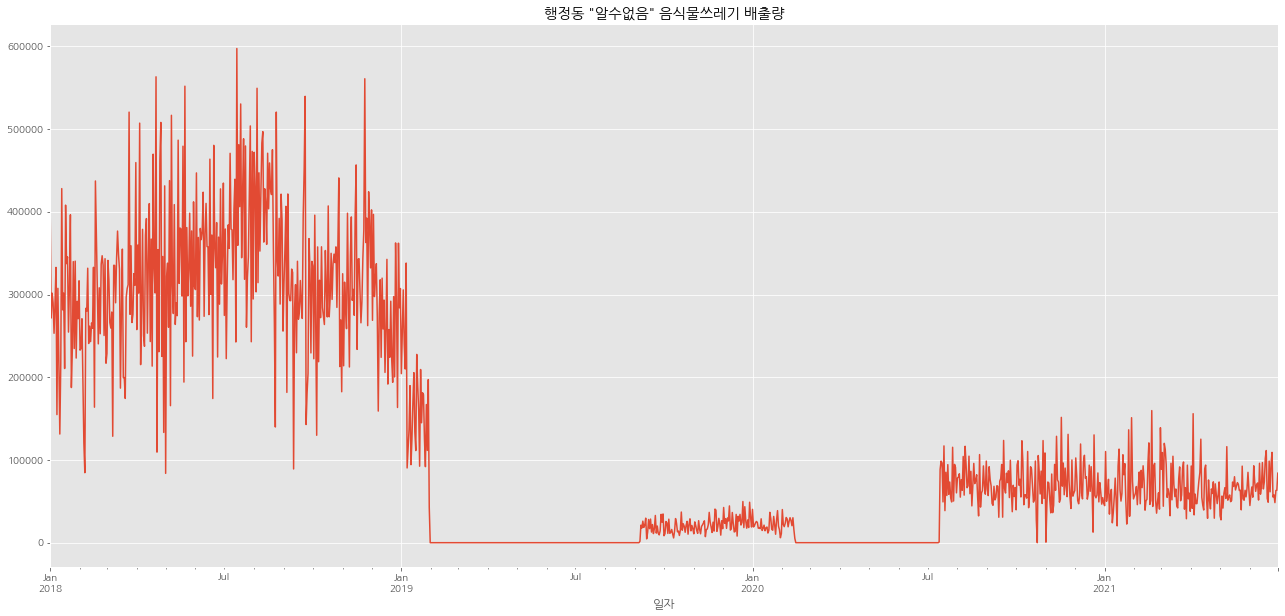

In [18]:
df.배출량.plot(figsize=(22,10), title='행정동 "알수없음" 음식물쓰레기 배출량')

<AxesSubplot:title={'center':'행정동 "알수없음" 음식물쓰레기 배출량(2020-07-14일부터)'}, xlabel='일자'>

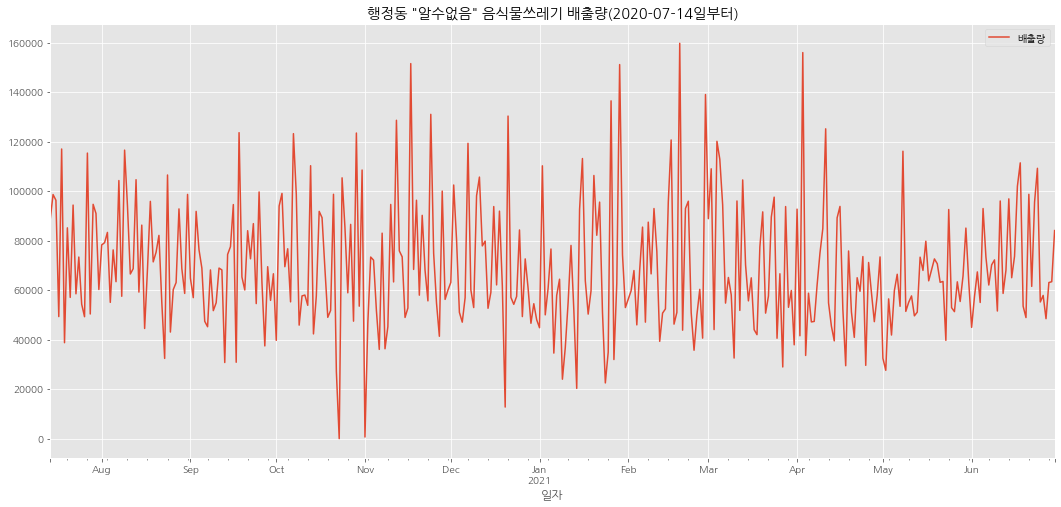

In [22]:
data = df[925:]
data.plot(figsize=(18,8), title='행정동 "알수없음" 음식물쓰레기 배출량(2020-07-14일부터)')

In [11]:
data.drop([ '행정시', '행정동'], axis=1, inplace=True)

In [12]:
df_pred.set_index('일자', inplace=True)

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def eval_reg(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:,.3f}".format(rmsle_val,rmse_val,mae_val))
#     return rmsle_val,rmse_val,mae_val

from pmdarima.arima import auto_arima

def make_model(data_train, col,data_test):
    model_auto = auto_arima(data_train[col],m=52, start_p=0, d=1, start_q=0, max_p = 5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, seasonal=True, trace=True,stepwise=True, random_state=20, n_fits=50)


    model_auto.summary()
    steps = len(data_test)
    data_test[col] = model_auto.predict(n_periods = steps)
    print(col+' 예측완료')
    return model_auto


In [15]:
예측 = make_model(data, '배출량', df_pred)
예측.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=7421.133, Time=0.98 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=7219.507, Time=4.51 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=5.58 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=7309.022, Time=1.07 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=19.37 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=11.75 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=7.14 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=33.23 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=7317.376, Time=3.50 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=7179.147, Time=6.23 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=7267.493, Time=0.90 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=19.53 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=18.07 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=14.44 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=inf, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  352
Model:             SARIMAX(5, 1, 1)x(2, 1, 1, 52)   Log Likelihood               -3541.416
Date:                            Tue, 14 Sep 2021   AIC                           7102.833
Time:                                    01:59:48   BIC                           7139.837
Sample:                                         0   HQIC                          7117.644
                                            - 352                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1512      0.198     -0.765      0.445      -0.539       0.236
ar.L2         -0.0671      0.187     -0.358      0.720      -0.434       0.300
ar.L3         -0.0126      0.184     -0.069      0.945      -0.372       0.347
ar.L4          0.0455      0.167      0.272      0.785      -0.282       0.373
ar.L5          0.0408      0.141      0.289      0.772      -0.236       0.317
ma.L1         -0.8364      0.164     -5.090      0.000      -1.159      -0.514
ar.S.L52      -0.2893      0.338     -0.855      0.393      -0.953       0.374
ar.S.L104     -0.0689      0.253     -0.272      0.786      -0.565       0.428
ma.S.L52      -0.5902      0.365     -1.619      0.105      -1.305       0.124
sigma2       1.75e+09   3.19e-10   5.48e+18      0.000    1.75e+09    1.75e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                23.41
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.59
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.37e+35. Standard errors may be unstable.
"""

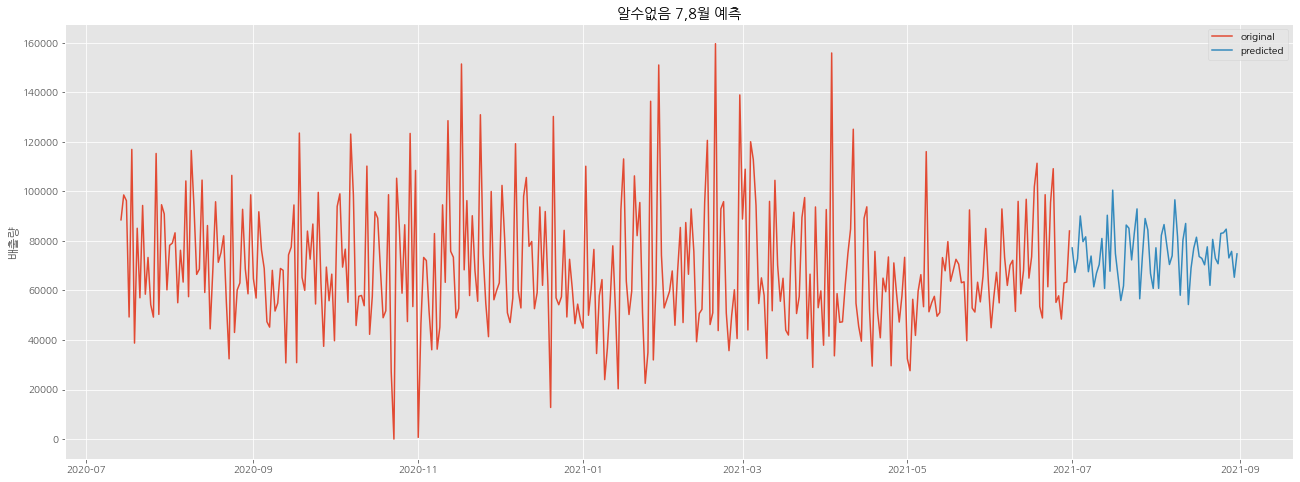

In [26]:
plt.figure(figsize=(22,8))
plt.plot(data.배출량,label = "original")
plt.plot(df_pred,label = "predicted")
plt.title("알수없음 7,8월 예측")
plt.xlabel("")
plt.ylabel("배출량")
plt.legend()
plt.show()

In [39]:
df_pred.to_csv('알수없음_배출량시계열_78월.csv', encoding='utf-8-sig')